In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [3]:
# Remove unnamed feature
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# remove Location and Subject Code
dataset.drop(['Location','Subject Code'], axis=1, inplace = True)


In [4]:
# Change object data type to numeric
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']
for i in objectFeatures:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')

In [5]:
#clean the NaN data
data = dataset.dropna()
data

month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0 -1.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  0.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0 -1.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0 -1.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0 -1.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

In [6]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5176\2028052787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TSV.replace({-3 : 0,


month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0  2.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  3.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0  2.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0  2.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0  2.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

<AxesSubplot:xlabel='TSV', ylabel='count'>

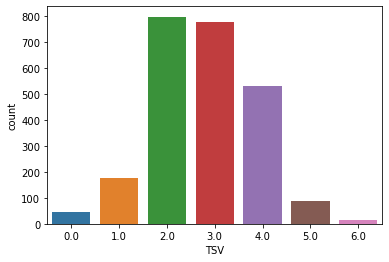

In [7]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

In [8]:
all_feature = data.columns
len(all_feature)

30

In [9]:
"""
Explore data on 3 section
1. Full Data --> all of parameter in dataset
2. Main Data --> only 6 parameter (ASHRAE-55)
3. Others Data --> exclude main parameter
"""
main_feature = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
target_label = ["TSV"]
others_feature = [x for x in all_feature if x not in (main_feature + target_label)]


In [10]:
full_data = data[main_feature + others_feature + target_label]
main_data = data[main_feature + target_label]
others_data = data[others_feature + target_label]

# Data Exploration

## Correlation Full_data

<AxesSubplot:>

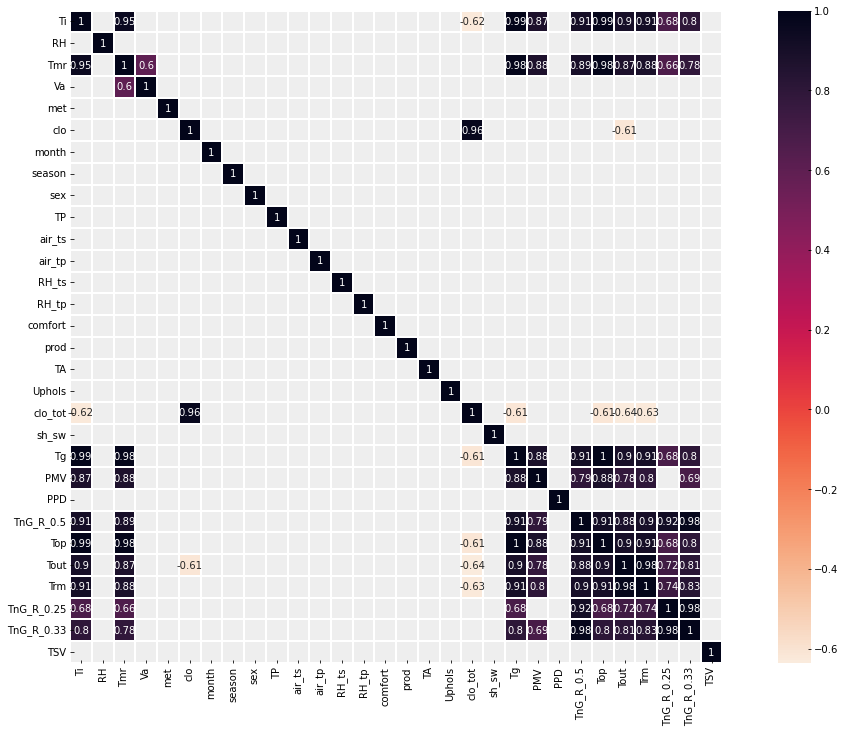

In [11]:
corr = full_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [12]:
corr_target = full_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

Ti            0.336710
Tmr           0.353391
TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25   -0.448108
TSV           1.000000
Name: TSV, dtype: float64

## Correlation main_data

<AxesSubplot:>

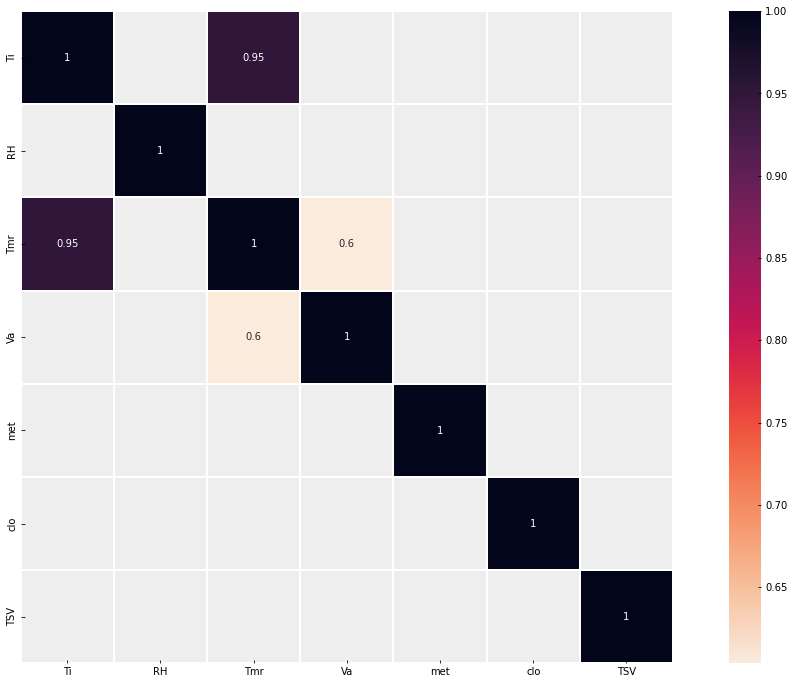

In [13]:
corr = main_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [14]:
corr_target = main_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

Ti     0.336710
Tmr    0.353391
TSV    1.000000
Name: TSV, dtype: float64

## Correlation others_data

<AxesSubplot:>

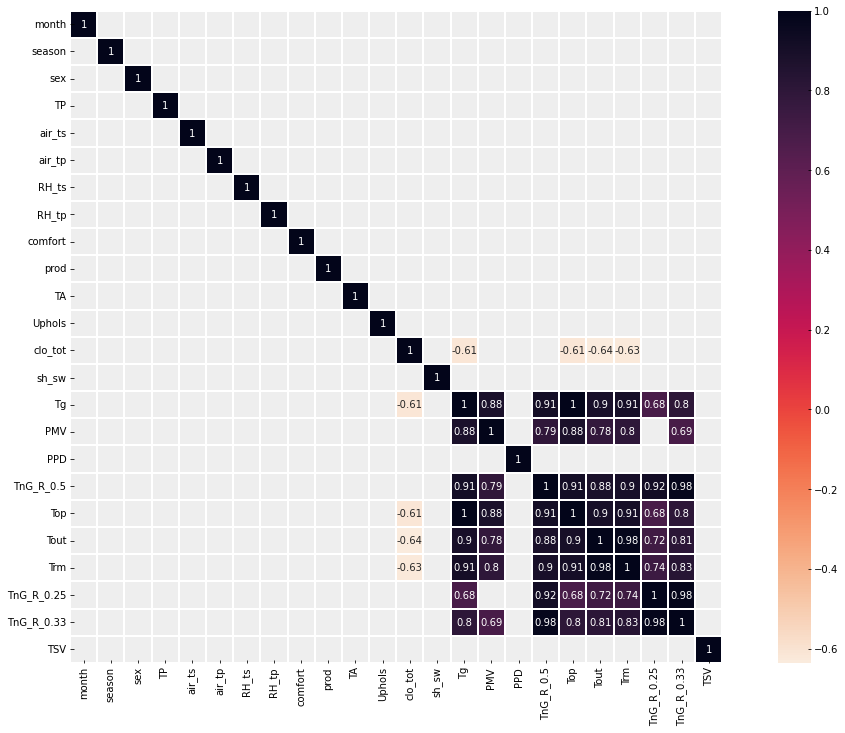

In [15]:
corr = others_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [16]:
corr_target = others_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25   -0.448108
TSV           1.000000
Name: TSV, dtype: float64

# Modeling

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

from datetime import datetime as dt
import time

In [132]:
scaler = StandardScaler()

#Full data
y_full = full_data[['TSV']].values.ravel()
X_full = full_data.drop(['TSV'], axis=1)

full_features = X_full.columns
X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = full_features)

#Main data
y_main = main_data[['TSV']].values.ravel()
X_main = main_data.drop(['TSV'], axis=1)

main_features = X_main.columns
X_main = pd.DataFrame(scaler.fit_transform(X_main),columns = main_features)


#Others data
y_others = others_data[['TSV']].values.ravel()
X_others = others_data.drop(['TSV'], axis=1)

others_features = X_others.columns
X_others = pd.DataFrame(scaler.fit_transform(X_others),columns = others_features)

# Splitting

In [133]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print(X_full_train.shape, X_full_test.shape)
print(y_full_train.shape, y_full_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [134]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, y_main, test_size=0.3, random_state=42)

print(X_main_train.shape, X_main_test.shape)
print(y_main_train.shape, y_main_test.shape)

(1703, 6) (731, 6)
(1703,) (731,)


In [135]:
X_others_train, X_others_test, y_others_train, y_others_test = train_test_split(X_others, y_others, test_size=0.3, random_state=42)

print(X_others_train.shape, X_others_test.shape)
print(y_others_train.shape, y_others_test.shape)

(1703, 23) (731, 23)
(1703,) (731,)


In [136]:
renamed_column = {'month' : 'Month',
                 'season' : 'Season',
                 'sex' : 'Sex',
                 'TSV' : 'Thermal Sensation Vote',
                 'TP' : 'Thermal Preference Vote',
                 'air_ts' : 'Air Sensation Vote',
                 'air_tp' : 'Air Preference Vote',
                 'RH_ts' : 'RH Sensation Vote',
                 'RH_tp' : 'RH Preference Vote',
                 'comfort' : 'Comfortability',
                 'prod' : 'Productivity',
                 'TA' : 'Thermal Acceptibility',
                 'clo' : 'Clothing Insulation',
                 'Uphols' : 'Upholerstery',
                 'clo_tot' : 'Clothing Instulation Total',
                 'met' : 'Metabolism Level',
                 'sh_sw' : 'Sweating/Shivering',
                 'Ti' : 'Indoor Air Temperature',
                 'Tg' : 'Indoor Globe Temperature',
                 'Va' : 'Air Movement',
                 'RH' : 'Relative Humidity',
                 'PMV' : 'Predicted Mean Vote',
                 'PPD' : 'Percentage Peaple Dissatified',
                 'TnG_R_0.5' : "Griffith's Neutral Temp (R-0.50)",
                 'Tmr' : 'Mean Radiant Temperature',
                 'Top' : 'Indoor Operative Temperature',
                 'Tout' : 'Outdoor Mean Temperature',
                 'Trm' : 'Outdoor Running Mean Temperature',
                 'TnG_R_0.25' : "Griffith's Neutral Temp (R-0.25)",
                 'TnG_R_0.33' : "Griffith's Neutral Temp (R-0.33)"}

In [143]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_mse = mean_squared_error(y_test, y_pred, squared = False)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  MSE   : {error_mse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred
    
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=0)

    
def importance(clf, X_data):
    X_new = X_data
    X_new.rename(renamed_column, axis='columns', inplace=True)
    features_name = X_new.columns
    
    fig, ax = plt.subplots(figsize=(20,16))
    # plot = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=15)
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    return results
  

# XGBoost Classifier

In [138]:
from xgboost import XGBClassifier

In [139]:
model_xgb = XGBClassifier()

## XGBoost full_data

In [140]:
clf_xgb_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_xgb)

Training model 
  Training time : 3.604733467102051 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.0753724575042725 seconds
  Testing accuracy : 0.9712722298221614

  MSE   : 0.1921866397915419
  MAE   : 0.03146374829001368
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.95      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.88      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



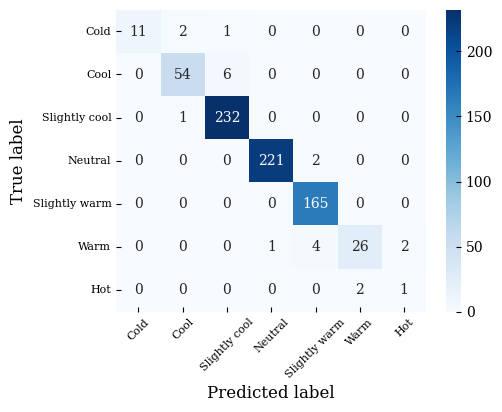

In [141]:
confusion(y_full_test, y_full_pred)

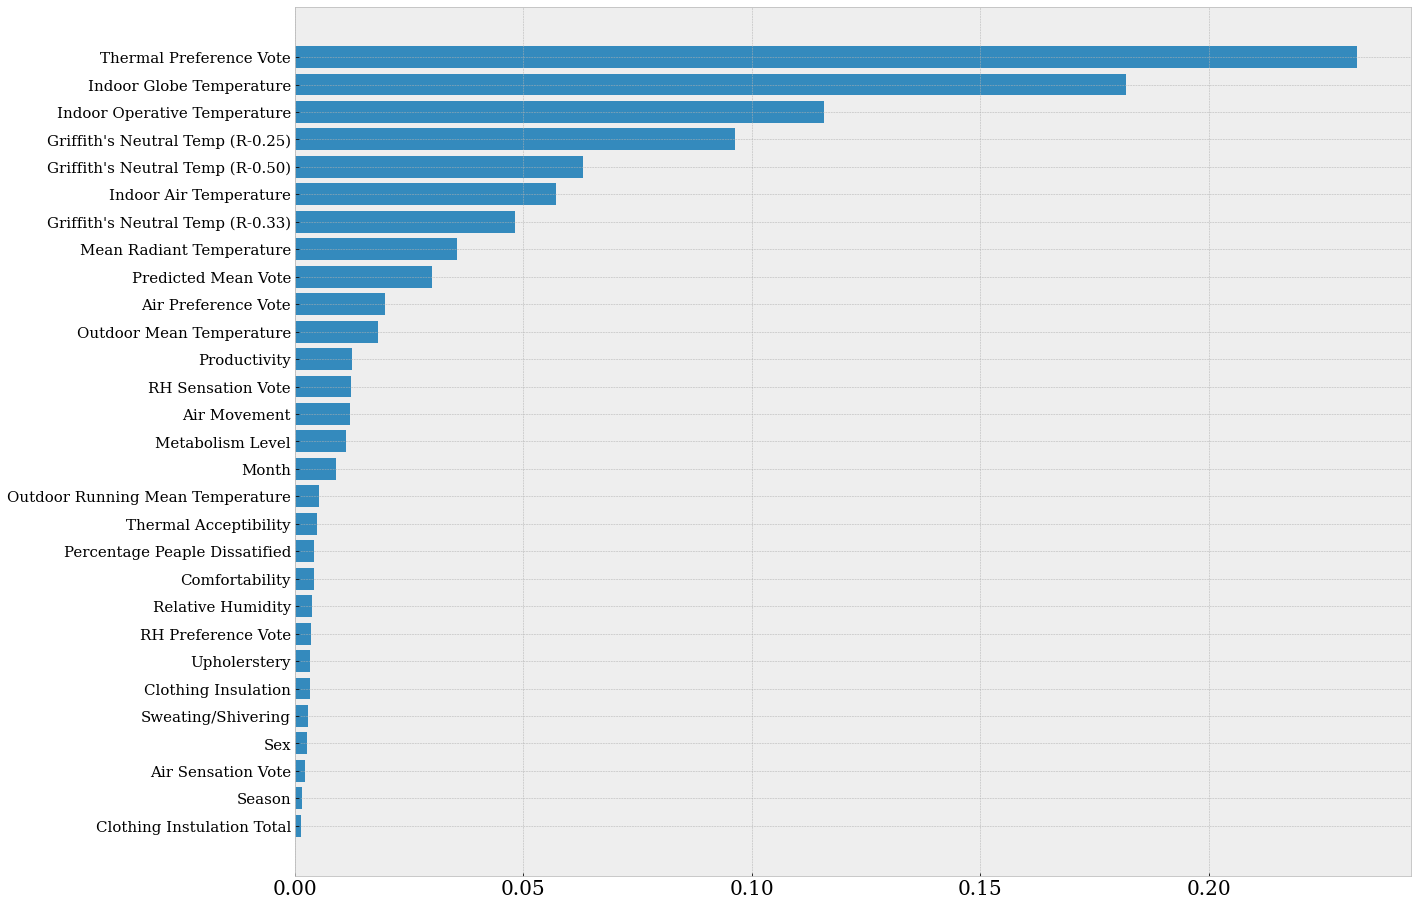

Features  Importances
18        Clothing Instulation Total     0.001444
7                             Season     0.001677
10                Air Sensation Vote     0.002188
8                                Sex     0.002632
19                Sweating/Shivering     0.002869
5                Clothing Insulation     0.003420
17                      Upholerstery     0.003456
13                RH Preference Vote     0.003598
1                  Relative Humidity     0.003897
14                    Comfortability     0.004208
22     Percentage Peaple Dissatified     0.004225
16             Thermal Acceptibility     0.004977
26  Outdoor Running Mean Temperature     0.005279
6                              Month     0.009081
4                   Metabolism Level     0.011270
3                       Air Movement     0.012074
12                 RH Sensation Vote     0.012271
15                      Productivity     0.012564
25          Outdoor Mean Temperature     0.018180
11               Air Preference Vote     0.019894
21               Predicted Mean Vote     0.030114
2           Mean Radiant Temperature     0.035466
28  Griffith's Neutral Temp (R-0.33)     0.048225
0             Indoor Air Temperature     0.057097
23  Griffith's Neutral Temp (R-0.50)     0.063160
27  Griffith's Neutral Temp (R-0.25)     0.096370
24      Indoor Operative Temperature     0.115805
20          Indoor Globe Temperature     0.182007
9            Thermal Preference Vote     0.232549

In [144]:
importance_full = importance(clf_xgb_full, X_full)
importance_full

## XGBoost main_data

In [145]:
clf_xgb_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_xgb)

Training model 
  Training time : 2.50287127494812 seconds
  Training accuracy : 0.9706400469759249

Testing model 
  Testing time : 1.2467615604400635 seconds
  Testing accuracy : 0.48700410396716826

  MSE   : 1.0571882797418488
  MAE   : 0.6935704514363885
  MAPE  : 129378375068099.34

Report :
              precision    recall  f1-score   support

         0.0       0.44      0.29      0.35        14
         1.0       0.38      0.22      0.28        60
         2.0       0.51      0.57      0.54       233
         3.0       0.47      0.55      0.51       223
         4.0       0.52      0.48      0.50       165
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.49       731
   macro avg       0.38      0.31      0.33       731
weighted avg       0.48      0.49      0.48       731



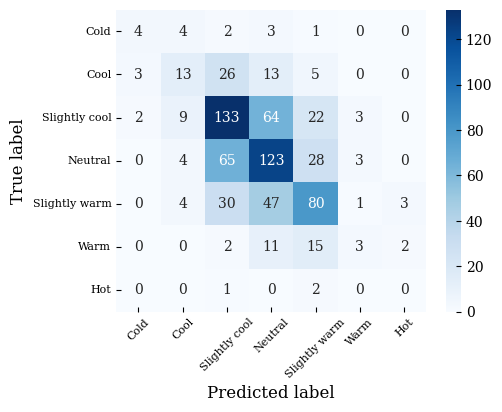

In [146]:
confusion(y_main_test, y_main_pred)

## XGBoost others_data

In [147]:
clf_xgb_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_xgb)

Training model 
  Training time : 1.346872329711914 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.4069430828094482 seconds
  Testing accuracy : 0.9699042407660738

  MSE   : 0.1849316803638273
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       0.99      0.99      0.99       223
         4.0       0.96      0.99      0.98       165
         5.0       0.93      0.82      0.87        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.97       731
   macro avg       0.90      0.83      0.86       731
weighted avg       0.97      0.97      0.97       731



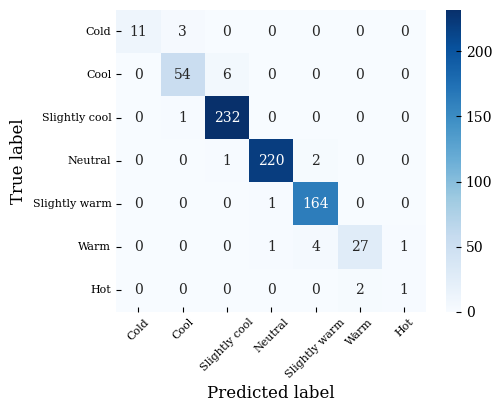

In [148]:
confusion(y_others_test, y_others_pred)

## XGBoost Importance

In [149]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', "Griffith's Neutral Temp (R-0.33)", 'Mean Radiant Temperature', 'Predicted Mean Vote', 'Air Preference Vote', 'Outdoor Mean Temperature', 'Productivity', 'RH Sensation Vote', 'Air Movement', 'Metabolism Level', 'Month', 'Outdoor Running Mean Temperature', 'Thermal Acceptibility', 'Percentage Peaple Dissatified', 'Comfortability']


20

In [152]:
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

#Selected data
y_importance = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_importance = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [153]:
clf_xgb_important, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_xgb)

Training model 
  Training time : 1.3687865734100342 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.5086963176727295 seconds
  Testing accuracy : 0.9753761969904241

  MSE   : 0.15691973428978245
  MAE   : 0.024623803009575923
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.84      0.86       731
weighted avg       0.97      0.98      0.97       731



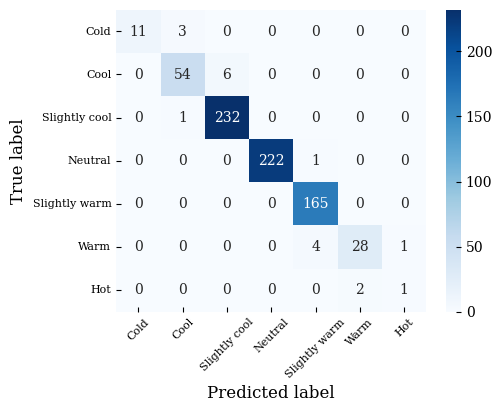

In [154]:
confusion(y_important_test, y_important_pred)

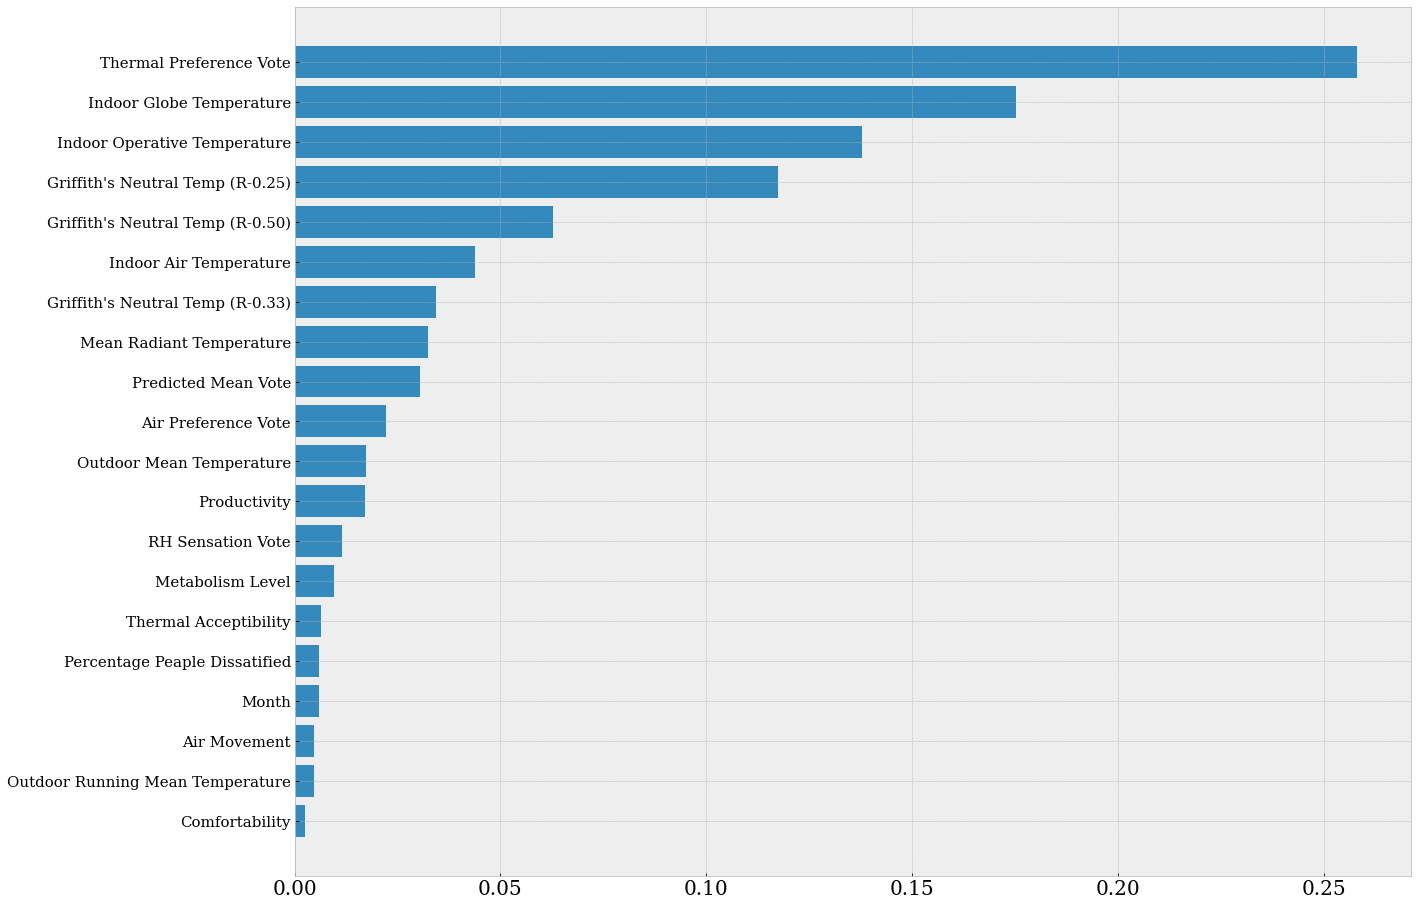

In [155]:
result = importance(clf_xgb_important, X_important)

# SVM Classifier

In [156]:
model_svm = SVC()

## SVM full_data

In [157]:
clf_svm_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_svm)

Training model 
  Training time : 1.5973825454711914 seconds
  Training accuracy : 0.9653552554315913

Testing model 
  Testing time : 0.6519660949707031 seconds
  Testing accuracy : 0.9015047879616963

  MSE   : 0.3328770246548891
  MAE   : 0.10259917920656635
  MAPE  : 73930500038913.8

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.75      0.70      0.72        60
         2.0       0.92      0.98      0.95       233
         3.0       0.98      0.99      0.98       223
         4.0       0.82      0.99      0.90       165
         5.0       1.00      0.09      0.17        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.56      0.57       731
weighted avg       0.91      0.90      0.88       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


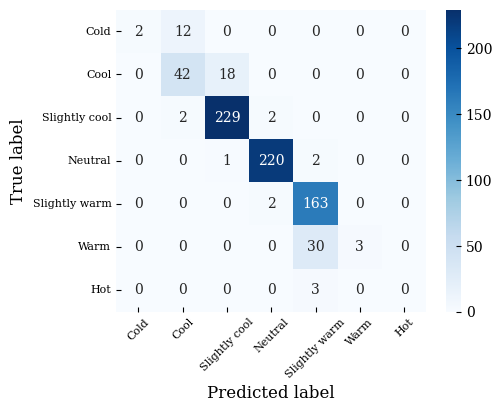

In [158]:
confusion(y_full_test, y_full_pred)

## SVM main_data

In [159]:
clf_svm_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_svm)

Training model 
  Training time : 0.8466241359710693 seconds
  Training accuracy : 0.48150322959483266

Testing model 
  Testing time : 0.6145145893096924 seconds
  Testing accuracy : 0.4473324213406293

  MSE   : 1.1034084737384975
  MAE   : 0.7523939808481532
  MAPE  : 215630625113498.72

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.46      0.62      0.53       233
         3.0       0.42      0.60      0.50       223
         4.0       0.48      0.30      0.37       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.45       731
   macro avg       0.19      0.22      0.20       731
weighted avg       0.38      0.45      0.40       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


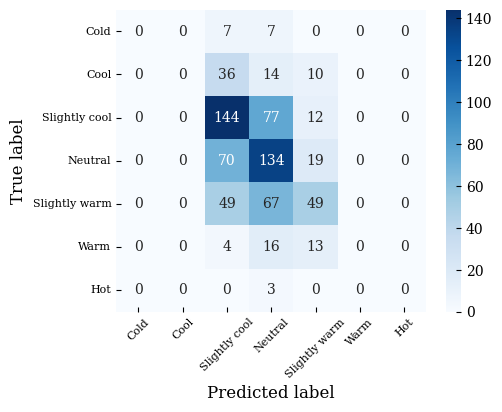

In [160]:
confusion(y_main_test, y_main_pred)

## SVM others_data

In [161]:
clf_svm_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_svm)

Training model 
  Training time : 0.6998827457427979 seconds
  Training accuracy : 0.9618320610687023

Testing model 
  Testing time : 0.46508073806762695 seconds
  Testing accuracy : 0.8987688098495212

  MSE   : 0.3429971702850177
  MAE   : 0.106703146374829
  MAPE  : 86252250045399.42

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13        14
         1.0       0.73      0.62      0.67        60
         2.0       0.90      0.99      0.94       233
         3.0       0.99      0.99      0.99       223
         4.0       0.83      0.99      0.91       165
         5.0       1.00      0.12      0.22        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.54      0.55       731
weighted avg       0.90      0.90      0.87       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


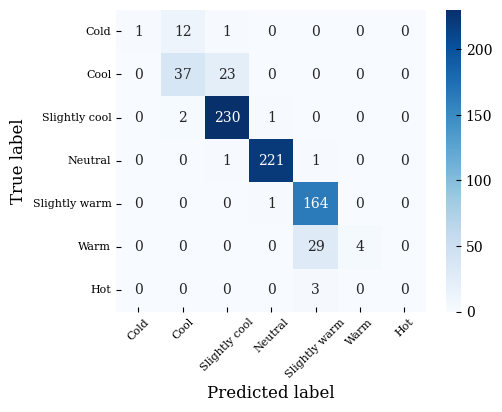

In [162]:
confusion(y_others_test, y_others_pred)

# XGBoost with Hyperparameter Tuning Using Bayesian Optimization with HYPEROPT

In [163]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [164]:
# initial value
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

# find the best parammeter
def hyperparam(X_train, y_train, X_test, y_test):
    def objective(space):
        clf=XGBClassifier(
                        n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']))

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)


        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred>0.5)
        print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    trials = Trials()

    best_hyperparams = fmin(fn = objective,
                            space = space,
                            algo = tpe.suggest,
                            max_evals = 100,
                            trials = trials)
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

## XGBoost Full_data with hyperparameter tuning Bayesian Optimization with HYPEROPT

In [165]:
full_param = hyperparam(X_full_train, y_full_train, X_full_test, y_full_test)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:25,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:41,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:38,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:35,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:31,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:25,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:23,  3.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 10%|████▌                                        | 10/100 [00:03<00:23,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:22,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:23,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:24,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:18,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:19,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:17,  4.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:05<00:22,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:22,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:19,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:17,  4.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:17,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:21,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:17,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:08<00:16,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:17,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:16,  4.00trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:15,  4.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:13,  4.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:15,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:10<00:15,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:11<00:14,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:11<00:13,  4.32trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:11<00:13,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:11<00:13,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:14,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:12<00:12,  4.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:13<00:11,  4.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:13<00:11,  4.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:13<00:11,  4.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 51%|██████████████████████▉                      | 51/100 [00:13<00:11,  4.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:13<00:10,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:14<00:10,  4.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:14<00:10,  4.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:14<00:09,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:15<00:10,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:16<00:11,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:16<00:10,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:16<00:09,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:16<00:09,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:17<00:08,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 66%|█████████████████████████████▋               | 66/100 [00:17<00:08,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:17<00:08,  3.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:17<00:08,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:18<00:08,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 70%|███████████████████████████████▍             | 70/100 [00:18<00:08,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:18<00:08,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:19<00:08,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:19<00:08,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:19<00:08,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:20<00:06,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 76%|██████████████████████████████████▏          | 76/100 [00:20<00:06,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:20<00:06,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:21<00:05,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:21<00:05,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:22<00:05,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:22<00:04,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:23<00:04,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:23<00:04,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:24<00:04,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:24<00:04,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:25<00:04,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|████████████████████████████████████████▉    | 91/100 [00:25<00:03,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:26<00:02,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 95%|██████████████████████████████████████████▊  | 95/100 [00:27<00:01,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:27<00:01,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:28<00:00,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|████████████████████████████████████████████| 100/100 [00:28<00:00,  3.50trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5022826058730301, 'gamma': 3.9694936062393777, 'max_depth': 8.0, 'min_child_weight': 7.0, 'reg_alpha': 138.0, 'reg_lambda': 0.41638917109515794}


In [166]:
model_xgb_full_hyper = XGBClassifier(
    colsample_bytree = int(full_param['colsample_bytree']), 
    gamma = full_param['gamma'],
    max_depth = int(full_param["max_depth"]),
    min_child_weight = int(full_param["min_child_weight"]),
    reg_alpha = int(full_param["reg_alpha"]),
    reg_lambda = full_param["reg_lambda"]
)

In [167]:
clf_xgb_full_hyper, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_xgb_full_hyper)

Training model 
  Training time : 0.35312414169311523 seconds
  Training accuracy : 0.4732824427480916

Testing model 
  Testing time : 0.2533299922943115 seconds
  Testing accuracy : 0.4637482900136799

  MSE   : 1.1904774933221978
  MAE   : 0.801641586867305
  MAPE  : 184826250097284.62

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.42      0.85      0.57       233
         3.0       0.54      0.63      0.58       223
         4.0       0.00      0.00      0.00       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.46       731
   macro avg       0.14      0.21      0.16       731
weighted avg       0.30      0.46      0.36       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


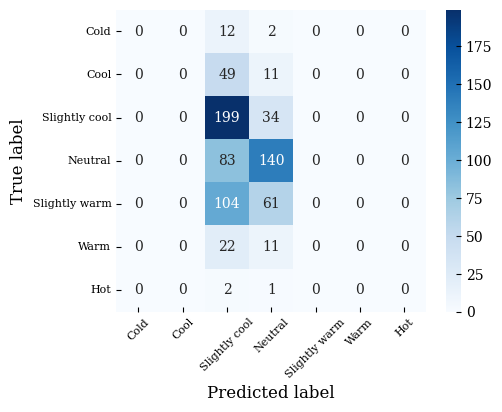

In [168]:
confusion(y_full_test, y_full_pred)

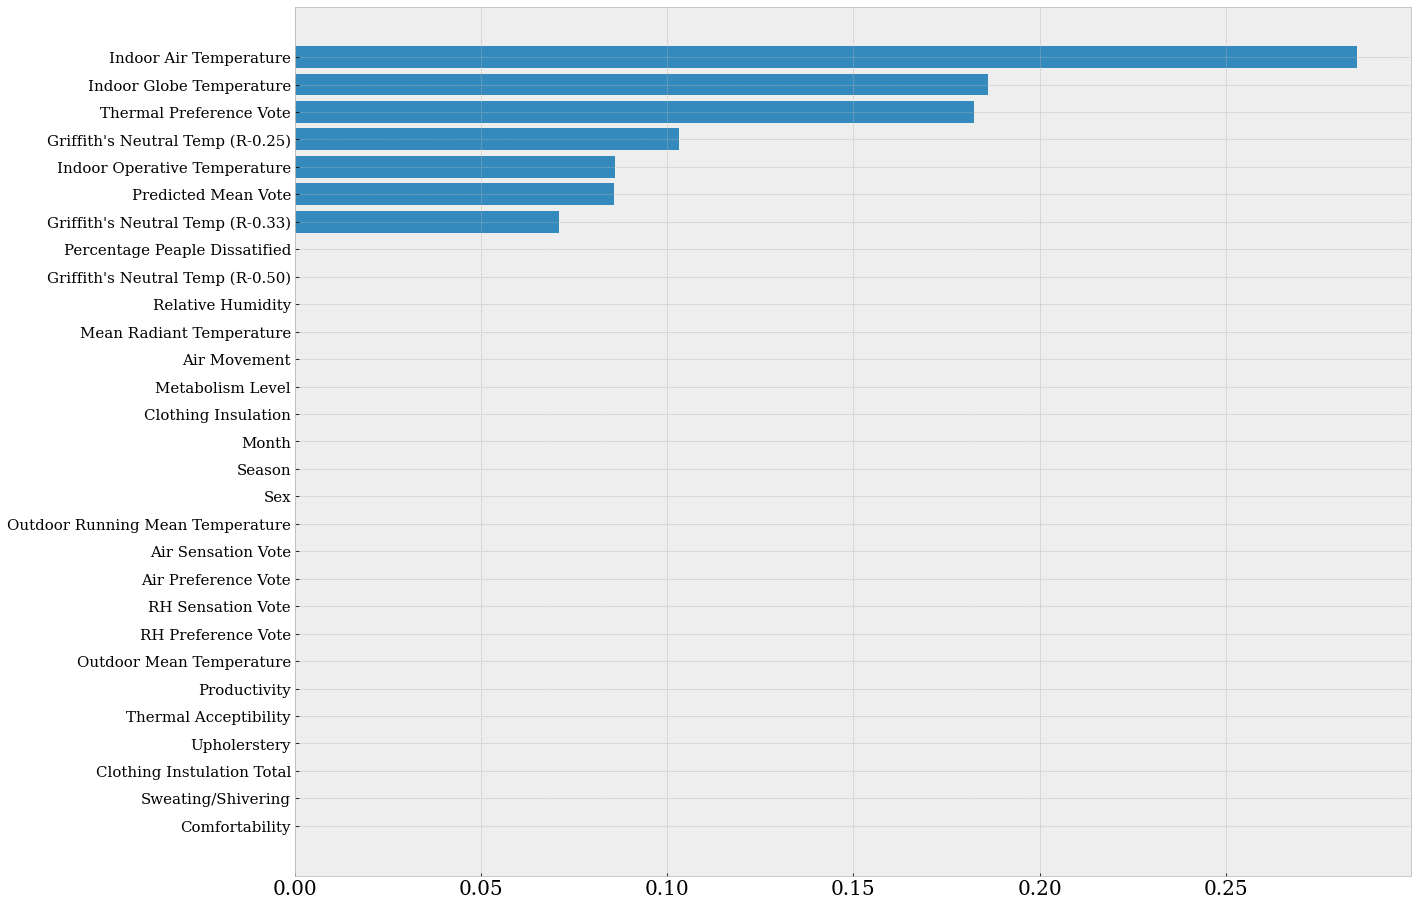

In [170]:
importance_full_hyp = importance(clf_xgb_full_hyper, X_full)

## XGBoost main_data with hyperparameter tuning Using Bayesian Optimization with HYPEROPT 

In [171]:
main_param = hyperparam(X_main_train, y_main_train, X_main_test, y_main_test)

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:10,  9.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:12,  7.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:20,  4.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:23,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:21,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:18,  5.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:02<00:15,  5.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:13,  6.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:13,  6.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:03<00:18,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:03<00:16,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 19%|████████▌                                    | 19/100 [00:04<00:17,  4.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:04<00:17,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:04<00:17,  4.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:04<00:17,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:19,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:05<00:17,  4.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:06<00:18,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:06<00:17,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:07<00:15,  4.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:07<00:13,  4.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:07<00:13,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:07<00:15,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:08<00:14,  4.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:08<00:13,  4.63trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:08<00:11,  5.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:09<00:10,  5.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:09<00:09,  5.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:09<00:08,  5.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:10<00:10,  5.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:10<00:09,  5.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:11<00:09,  4.96trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:11<00:09,  4.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:11<00:08,  5.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:12<00:09,  4.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:12<00:08,  5.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:12<00:07,  5.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:13<00:07,  5.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:13<00:07,  4.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:13<00:06,  5.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:14<00:07,  4.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:14<00:08,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:15<00:06,  4.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:15<00:06,  4.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:15<00:05,  4.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:16<00:05,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:16<00:04,  4.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:17<00:04,  4.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:17<00:04,  4.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:17<00:03,  5.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:17<00:03,  4.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:18<00:03,  4.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:18<00:02,  5.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:18<00:02,  5.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:19<00:02,  4.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:19<00:01,  5.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:19<00:01,  5.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:20<00:01,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:20<00:01,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:21<00:00,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:21<00:00,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:21<00:00,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|████████████████████████████████████████████| 100/100 [00:21<00:00,  4.58trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7804826920955428, 'gamma': 8.346624385102036, 'max_depth': 18.0, 'min_child_weight': 1.0, 'reg_alpha': 99.0, 'reg_lambda': 0.2668818615123535}


In [172]:
model_xgb_main_hyper = XGBClassifier(
    colsample_bytree = int(full_param['colsample_bytree']), 
    gamma = full_param['gamma'],
    max_depth = int(full_param["max_depth"]),
    min_child_weight = int(full_param["min_child_weight"]),
    reg_alpha = int(full_param["reg_alpha"]),
    reg_lambda = full_param["reg_lambda"]
)
clf_xgb_main_hyper, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_xgb_main_hyper)

Training model 
  Training time : 0.3506035804748535 seconds
  Training accuracy : 0.4286553141514974

Testing model 
  Testing time : 0.17621326446533203 seconds
  Testing accuracy : 0.40902872777017785

  MSE   : 1.0915669781796522
  MAE   : 0.7783857729138167
  MAPE  : 215630625113498.72

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.47      0.66      0.55       233
         3.0       0.36      0.65      0.46       223
         4.0       0.00      0.00      0.00       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.41       731
   macro avg       0.12      0.19      0.14       731
weighted avg       0.26      0.41      0.32       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


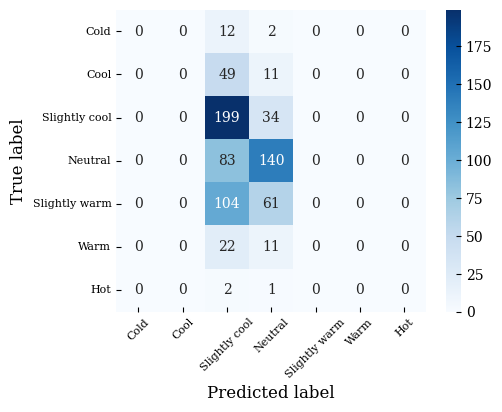

In [173]:
confusion(y_full_test, y_full_pred)

## XGBoost others_data with hyperparameter tuning Using Bayesian Optimization with HYPEROPT

In [174]:
others_param = hyperparam(X_others_train, y_others_train, X_others_test, y_others_test)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:56,  1.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:37,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:39,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:39,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:32,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:29,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:24,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:29,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:37,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:33,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:24,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:30,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:29,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:30,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:30,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 24%|██████████▊                                  | 24/100 [00:08<00:26,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:26,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:28,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:26,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:26,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:27,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:26,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:28,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|██████████████▊                              | 33/100 [00:12<00:24,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:26,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:25,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:30,  2.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:14<00:31,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:28,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:27,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:26,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:16<00:25,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:16,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 45%|████████████████████▎                        | 45/100 [00:17<00:16,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:14,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:20,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:27,  1.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:27,  1.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:20<00:28,  1.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:23,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:21<00:22,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:19,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:22<00:19,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:22<00:19,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:23<00:22,  1.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:21,  1.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:24<00:18,  2.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:25<00:21,  1.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:25<00:19,  1.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:25<00:18,  2.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:26<00:16,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:26<00:17,  2.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:27<00:18,  1.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:28<00:17,  1.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:28<00:17,  1.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:29<00:18,  1.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:30<00:20,  1.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:30<00:18,  1.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:31<00:17,  1.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:31<00:15,  1.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:32<00:16,  1.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:32<00:14,  1.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:33<00:10,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:34<00:09,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:34<00:07,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:35<00:07,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:35<00:08,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:36<00:09,  1.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|█████████████████████████████████████▊       | 84/100 [00:36<00:07,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:37<00:06,  2.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:37<00:05,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:38<00:05,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:39<00:04,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|████████████████████████████████████████▌    | 90/100 [00:39<00:03,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:39<00:03,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:40<00:03,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:40<00:03,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:41<00:02,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:41<00:02,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:42<00:01,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:42<00:00,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:42<00:00,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:43<00:00,  2.30trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6182933116118179, 'gamma': 2.178545187860884, 'max_depth': 5.0, 'min_child_weight': 4.0, 'reg_alpha': 58.0, 'reg_lambda': 0.9480774213797657}


In [175]:
model_xgb_others_hyper = XGBClassifier(
    colsample_bytree = int(full_param['colsample_bytree']), 
    gamma = full_param['gamma'],
    max_depth = int(full_param["max_depth"]),
    min_child_weight = int(full_param["min_child_weight"]),
    reg_alpha = int(full_param["reg_alpha"]),
    reg_lambda = full_param["reg_lambda"]
)
clf_xgb_others_hyper, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_xgb_others_hyper)

Training model 
  Training time : 0.5106942653656006 seconds
  Training accuracy : 0.4674104521432766

Testing model 
  Testing time : 0.22748661041259766 seconds
  Testing accuracy : 0.4473324213406293

  MSE   : 1.1666829521370035
  MAE   : 0.7975376196990424
  MAPE  : 190987125100527.44

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.42      0.70      0.53       233
         3.0       0.48      0.74      0.58       223
         4.0       0.00      0.00      0.00       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.45       731
   macro avg       0.13      0.21      0.16       731
weighted avg       0.28      0.45      0.34       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


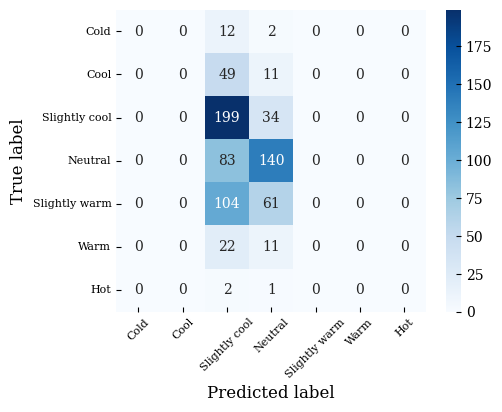

In [176]:
confusion(y_full_test, y_full_pred)

## XGBoost importance feature with hyperparameter tuning Using Bayesian Optimization with HYPEROPT 

In [177]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', "Griffith's Neutral Temp (R-0.33)", 'Mean Radiant Temperature', 'Predicted Mean Vote', 'Air Preference Vote', 'Outdoor Mean Temperature', 'Productivity', 'RH Sensation Vote', 'Air Movement', 'Metabolism Level', 'Month', 'Outdoor Running Mean Temperature', 'Thermal Acceptibility', 'Percentage Peaple Dissatified', 'Comfortability']


20

In [178]:
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

#Selected data
y_importance = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_importance = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [179]:
important_param = hyperparam(X_important_train, y_important_train, X_important_test, y_important_test)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:54,  1.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:40,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:38,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:35,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:50,  1.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:37,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:29,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:29,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:29,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:26,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:34,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:29,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:06<00:27,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:29,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:32,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:28,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:25,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:26,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:22,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|██████████▊                                  | 24/100 [00:08<00:21,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:22,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:21,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:26,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:22,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 30%|█████████████▌                               | 30/100 [00:10<00:20,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:20,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:19,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:23,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:27,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:27,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:23,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:24,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:24,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:31,  1.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:29,  1.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:30,  1.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 44%|███████████████████▊                         | 44/100 [00:17<00:34,  1.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:28,  1.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:18,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 50%|██████████████████████▌                      | 50/100 [00:19<00:16,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:16,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:15,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:16,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:22,  1.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:22<00:22,  1.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:18,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:16,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:19,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:24<00:18,  2.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:18,  2.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:25<00:17,  2.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:25<00:17,  2.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:26<00:14,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:12,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:27<00:12,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:27<00:12,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 71%|███████████████████████████████▉             | 71/100 [00:28<00:10,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 73%|████████████████████████████████▊            | 73/100 [00:28<00:08,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:29<00:08,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:08,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:30<00:09,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:08,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:31<00:07,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:07,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:32<00:07,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:06,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:32<00:05,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 84%|█████████████████████████████████████▊       | 84/100 [00:33<00:06,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:33<00:04,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:04,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:03,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:03,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:03,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:02,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 95%|██████████████████████████████████████████▊  | 95/100 [00:37<00:02,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:37<00:01,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:39<00:00,  2.53trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8640589489117518, 'gamma': 3.648324126534649, 'max_depth': 3.0, 'min_child_weight': 3.0, 'reg_alpha': 62.0, 'reg_lambda': 0.2626688022972926}


In [180]:
model_xgb_important_hyper = XGBClassifier(
    colsample_bytree = int(full_param['colsample_bytree']), 
    gamma = full_param['gamma'],
    max_depth = int(full_param["max_depth"]),
    min_child_weight = int(full_param["min_child_weight"]),
    reg_alpha = int(full_param["reg_alpha"]),
    reg_lambda = full_param["reg_lambda"]
)
clf_xgb_important_hyper, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_xgb_important_hyper)

Training model 
  Training time : 0.36435365676879883 seconds
  Training accuracy : 0.4997064004697592

Testing model 
  Testing time : 0.198408842086792 seconds
  Testing accuracy : 0.4692202462380301

  MSE   : 1.006816711502583
  MAE   : 0.6826265389876881
  MAPE  : 197148000103770.22

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.53      0.82      0.65       233
         3.0       0.41      0.69      0.51       223
         4.0       0.00      0.00      0.00       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.47       731
   macro avg       0.13      0.21      0.17       731
weighted avg       0.29      0.47      0.36       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


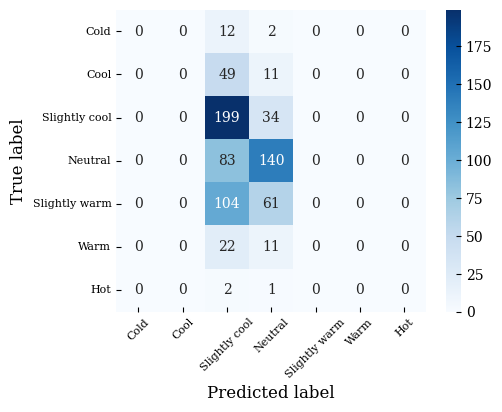

In [181]:
confusion(y_full_test, y_full_pred)

# Compare

In [182]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
# importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', "Griffith's Neutral Temp (R-0.33)", 'Mean Radiant Temperature', 'Predicted Mean Vote', 'Air Preference Vote', 'Outdoor Mean Temperature', 'Productivity', 'RH Sensation Vote', 'Air Movement', 'Metabolism Level', 'Month', 'Outdoor Running Mean Temperature', 'Thermal Acceptibility', 'Percentage Peaple Dissatified', 'Comfortability', 'Relative Humidity', 'RH Preference Vote', 'Upholerstery', 'Clothing Insulation', 'Sweating/Shivering', 'Sex', 'Air Sensation Vote', 'Season', 'Clothing Instulation Total']


29

In [184]:
featureNum = []

# XGBoost data
trainAcc_xgb = []
testAcc_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

# SVM data
trainAcc_svm = []
testAcc_svm = []
MSE_svm = []
MAE_svm = []
MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp = []
testAcc_xgb_hyp = []
MSE_xgb_hyp = []
MAE_xgb_hyp = []
MAPE_xgb_hyp = []


model_xgb = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum.append(i + 1)
#     y = data[['TSV']].values.ravel()
#     x = data[importance_features[0:i + 1]]
    
    full_data_renamed = full_data
    full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

    #Selected data
    y = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
    x = full_data_renamed[importance_features[0:i+1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # SVM
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_svm.append(accuracy_score(y_train, y_pred))
    
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_svm.append(accuracy_score(y_test, y_pred))
    
    MSE_svm.append(mean_squared_error(y_test, y_pred))
    MAE_svm.append(mean_absolute_error(y_test, y_pred))
    MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # XGBoost with parameter tuning
    param = hyperparam(X_train, y_train, X_test, y_test)
    
    model_xgb_hyp = XGBClassifier(
        colsample_bytree = int(param['colsample_bytree']), 
        gamma = param['gamma'],
        max_depth = int(param["max_depth"]),
        min_child_weight = int(param["min_child_weight"]),
        reg_alpha = int(param["reg_alpha"]),
        reg_lambda = param["reg_lambda"]
    )
    
    clf = model_xgb_hyp.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb_hyp.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb_hyp.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp.append(mean_absolute_percentage_error(y_test, y_pred))
    

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:15,  6.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:13,  7.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:00<00:13,  7.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:14,  6.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:01<00:14,  6.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:01<00:15,  5.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:14,  6.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:13,  6.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:02<00:14,  5.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:02<00:13,  6.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:03<00:12,  6.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:03<00:13,  5.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:03<00:13,  5.94trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:03<00:13,  5.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:04<00:12,  5.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:04<00:11,  6.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:04<00:11,  6.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:05<00:11,  6.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:05<00:12,  5.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:05<00:12,  5.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:06<00:12,  5.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:06<00:13,  4.69trial/s, best loss: -0.08207934336525308]

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:06<00:12,  4.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:06<00:11,  5.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:07<00:11,  5.31trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:07<00:10,  5.35trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:07<00:09,  5.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:07<00:10,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:08<00:10,  5.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:08<00:09,  5.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:08<00:09,  5.21trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:08<00:08,  5.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:09<00:08,  5.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:09<00:08,  5.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:09<00:09,  4.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:09<00:08,  4.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:10<00:14,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:10<00:10,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:11<00:08,  4.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:11<00:06,  5.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:11<00:06,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:12<00:05,  5.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:12<00:05,  5.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:12<00:04,  6.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:13<00:04,  6.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:13<00:04,  5.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:13<00:03,  5.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:14<00:03,  5.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:14<00:03,  6.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:14<00:02,  6.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:15<00:02,  6.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:15<00:01,  6.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:15<00:01,  6.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:16<00:01,  6.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:16<00:01,  5.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:16<00:00,  5.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:17<00:00,  5.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:17<00:00,  6.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:17<00:00,  5.68trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7875473518384953, 'gamma': 2.2014860807658634, 'max_depth': 8.0, 'min_child_weight': 5.0, 'reg_alpha': 130.0, 'reg_lambda': 0.4862453102586004}
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:14,  6.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:15,  6.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:00<00:14,  6.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:14,  6.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:01<00:13,  6.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:01<00:14,  6.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:15,  5.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:14,  6.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:02<00:16,  5.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:03<00:14,  5.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:03<00:13,  6.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:03<00:12,  6.21trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:03<00:12,  6.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:04<00:12,  5.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:04<00:12,  5.72trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:04<00:13,  5.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:04<00:13,  5.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:05<00:12,  5.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:05<00:11,  5.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:06<00:11,  5.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:06<00:10,  5.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:06<00:11,  5.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:06<00:11,  5.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:07<00:11,  5.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:07<00:10,  5.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:07<00:09,  5.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:08<00:10,  5.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:08<00:09,  5.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:08<00:08,  5.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:09<00:08,  5.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:09<00:07,  5.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:09<00:07,  6.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:10<00:07,  5.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:10<00:07,  5.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:10<00:06,  5.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:11<00:06,  5.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:11<00:06,  5.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:11<00:06,  5.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:11<00:06,  5.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:12<00:05,  5.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:12<00:05,  4.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:13<00:05,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:13<00:05,  4.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:13<00:05,  4.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:13<00:05,  4.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:13<00:04,  4.70trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:14<00:04,  5.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:14<00:04,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:14<00:03,  4.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:15<00:03,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:15<00:03,  4.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:15<00:02,  5.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:16<00:02,  4.92trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:16<00:02,  4.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:16<00:02,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:16<00:01,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:17<00:01,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:17<00:01,  4.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:17<00:01,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:17<00:01,  4.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:18<00:00,  4.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:18<00:00,  4.90trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:18<00:00,  4.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:18<00:00,  5.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(




The best hyperparameters are :  

{'colsample_bytree': 0.7574915444707371, 'gamma': 6.89234408867725, 'max_depth': 4.0, 'min_child_weight': 2.0, 'reg_alpha': 155.0, 'reg_lambda': 0.20083097036042363}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:22,  4.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:18,  5.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:17,  5.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:17,  5.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:17,  5.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:17,  5.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:16,  5.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:15,  5.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:03<00:14,  5.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:04<00:14,  5.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:04<00:17,  4.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:05<00:17,  4.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:05<00:16,  4.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:06<00:15,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:07<00:15,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:07<00:14,  4.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:07<00:14,  4.55trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:08<00:12,  4.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:08<00:11,  5.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:08<00:11,  5.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:09<00:11,  4.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:09<00:11,  4.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:09<00:11,  4.84trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:09<00:10,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:10<00:11,  4.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:10<00:10,  4.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:10<00:09,  4.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:11<00:09,  4.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:11<00:08,  4.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:11<00:08,  5.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:12<00:08,  4.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:12<00:07,  5.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:12<00:07,  5.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:13<00:07,  5.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:13<00:06,  5.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:13<00:06,  4.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:14<00:06,  4.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:14<00:06,  4.85trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:14<00:06,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:15<00:06,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:15<00:06,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:16<00:08,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:17<00:06,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:17<00:07,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:18<00:07,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:18<00:06,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:18<00:06,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:19<00:05,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:19<00:04,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:20<00:04,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:20<00:04,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:20<00:04,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:21<00:03,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:21<00:02,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:22<00:01,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:22<00:01,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:22<00:01,  4.26trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:22<00:00,  4.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:23<00:00,  4.67trial/s, best loss: -0.08207934336525308]

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:23<00:00,  4.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:23<00:00,  4.25trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8339377730914597, 'gamma': 1.1012899366428792, 'max_depth': 16.0, 'min_child_weight': 4.0, 'reg_alpha': 148.0, 'reg_lambda': 0.7585141166417427}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:20,  4.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:22,  4.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  5%|██▎                                           | 5/100 [00:01<00:20,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:21,  4.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:20,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:02<00:18,  4.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:19,  4.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:20,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:03<00:20,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:19,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:04<00:17,  4.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:04<00:16,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:05<00:16,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:18,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:18,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|███████████▎                                 | 25/100 [00:05<00:18,  4.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:06<00:18,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:07<00:16,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:07<00:16,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:07<00:16,  4.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:07<00:16,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:08<00:15,  4.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:08<00:15,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:08<00:14,  4.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:09<00:11,  5.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:09<00:11,  5.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:09<00:12,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:10<00:11,  4.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 47%|█████████████████████▏                       | 47/100 [00:10<00:11,  4.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:11<00:11,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:11<00:11,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:12<00:10,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:12<00:10,  4.16trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:13<00:10,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:13<00:10,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|██████████████████████████▌                  | 59/100 [00:13<00:10,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:14<00:10,  3.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:14<00:09,  4.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:15<00:09,  4.07trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 65%|█████████████████████████████▎               | 65/100 [00:15<00:08,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:15<00:08,  4.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:16<00:07,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:16<00:07,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:16<00:07,  4.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:17<00:06,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:17<00:06,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:18<00:05,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:18<00:05,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:19<00:04,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:19<00:04,  4.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:19<00:03,  4.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:19<00:03,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:20<00:03,  4.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:20<00:03,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:20<00:02,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:21<00:02,  4.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 90%|████████████████████████████████████████▌    | 90/100 [00:21<00:02,  4.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 92%|█████████████████████████████████████████▍   | 92/100 [00:22<00:02,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:22<00:01,  3.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:22<00:01,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:22<00:00,  4.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:23<00:00,  4.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:23<00:00,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:24<00:00,  4.14trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5531686022185858, 'gamma': 3.6149163717322983, 'max_depth': 16.0, 'min_child_weight': 6.0, 'reg_alpha': 175.0, 'reg_lambda': 0.40686774854429586}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  4%|█▊                                            | 4/100 [00:00<00:21,  4.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:20,  4.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:19,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:17,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:16,  5.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:17,  5.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 16%|███████▏                                     | 16/100 [00:03<00:17,  4.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:18,  4.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 19%|████████▌                                    | 19/100 [00:04<00:17,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:04<00:18,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:05<00:20,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:19,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:05<00:19,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:06<00:18,  3.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:07<00:19,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:07<00:17,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:08<00:19,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:08<00:16,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:09<00:16,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████                            | 38/100 [00:09<00:15,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:09<00:16,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:09<00:14,  4.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:10<00:13,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:10<00:15,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 45%|████████████████████▎                        | 45/100 [00:11<00:14,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:11<00:13,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:11<00:12,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:12<00:13,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:12<00:13,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
 51%|██████████████████████▉                      | 51/100 [00:12<00:13,  3.73trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:13<00:11,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:13<00:09,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 56%|█████████████████████████▏                   | 56/100 [00:13<00:09,  4.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:14<00:09,  4.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:14<00:09,  4.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:14<00:09,  4.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:14<00:09,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:15<00:09,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:15<00:08,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:15<00:08,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:16<00:08,  4.26trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:16<00:08,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:16<00:07,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:17<00:07,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 71%|███████████████████████████████▉             | 71/100 [00:17<00:07,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:18<00:07,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|█████████████████████████████████▎           | 74/100 [00:18<00:06,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:18<00:06,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:19<00:05,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:19<00:05,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:19<00:05,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████         | 80/100 [00:19<00:04,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:20<00:05,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:20<00:04,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:20<00:04,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:21<00:03,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 88%|███████████████████████████████████████▌     | 88/100 [00:22<00:03,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:22<00:03,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|████████████████████████████████████████▌    | 90/100 [00:22<00:02,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:23<00:02,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:23<00:01,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:24<00:01,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:24<00:00,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:24<00:00,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:24<00:00,  4.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:24<00:00,  4.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:25<00:00,  3.97trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(




The best hyperparameters are :  

{'colsample_bytree': 0.7642343942743715, 'gamma': 4.428236609658215, 'max_depth': 15.0, 'min_child_weight': 6.0, 'reg_alpha': 156.0, 'reg_lambda': 0.4474937718940716}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:27,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:25,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:26,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:25,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:24,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:22,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:26,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:27,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:26,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:25,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:03<00:24,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:22,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:19,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:05<00:20,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:21,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:22,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 24%|██████████▊                                  | 24/100 [00:06<00:20,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:20,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:21,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 28%|████████████▌                                | 28/100 [00:08<00:21,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:20,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:19,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:18,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:16,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 36%|████████████████▏                            | 36/100 [00:10<00:16,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 38%|█████████████████                            | 38/100 [00:10<00:15,  3.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:10<00:15,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:11<00:14,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:11<00:14,  4.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 44%|███████████████████▊                         | 44/100 [00:11<00:13,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:12<00:14,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▏                       | 47/100 [00:12<00:13,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:13<00:14,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 49%|██████████████████████                       | 49/100 [00:13<00:14,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:13<00:13,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:14<00:12,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:14<00:12,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:14<00:12,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:14<00:12,  3.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:15<00:11,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:16<00:12,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|██████████████████████████▌                  | 59/100 [00:16<00:11,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:16<00:10,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:16<00:10,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|███████████████████████████▉                 | 62/100 [00:16<00:09,  3.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:17<00:09,  3.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:17<00:09,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:18<00:09,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:19<00:07,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:19<00:07,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:19<00:07,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:20<00:06,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 76%|██████████████████████████████████▏          | 76/100 [00:20<00:06,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:21<00:08,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:21<00:06,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:21<00:06,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:22<00:05,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 83%|█████████████████████████████████████▎       | 83/100 [00:23<00:04,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:23<00:03,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 86%|██████████████████████████████████████▋      | 86/100 [00:23<00:03,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:24<00:03,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:24<00:03,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 91%|████████████████████████████████████████▉    | 91/100 [00:24<00:02,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:25<00:02,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|█████████████████████████████████████████▊   | 93/100 [00:25<00:01,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:26<00:01,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 98%|████████████████████████████████████████████ | 98/100 [00:27<00:00,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:27<00:00,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:27<00:00,  3.61trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.9338863583668895, 'gamma': 1.8781699772838412, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 175.0, 'reg_lambda': 0.4773677588200155}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:45,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:39,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:33,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:27,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:22,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:22,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:21,  4.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:22,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:20,  4.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:18,  4.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:04<00:17,  4.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:04<00:19,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:19,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:05<00:21,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:21,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 24%|██████████▊                                  | 24/100 [00:06<00:22,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:21,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|███████████▋                                 | 26/100 [00:06<00:19,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:20,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:07<00:22,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████                                | 29/100 [00:07<00:20,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:21,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:24,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:20,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:20,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:20,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:21,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:19,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:18,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:17,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:16,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 43%|███████████████████▎                         | 43/100 [00:12<00:15,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:12<00:14,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:15,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:13<00:16,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:13<00:14,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:14,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:14<00:16,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:15<00:13,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 54%|████████████████████████▎                    | 54/100 [00:15<00:13,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:15<00:13,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:16<00:14,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:16<00:14,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:17,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:17<00:13,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:18<00:11,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:19<00:10,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:19<00:10,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:20<00:11,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:20<00:11,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:20<00:11,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:21<00:10,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:21<00:10,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:22<00:08,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:22<00:07,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:06,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:23<00:06,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:24<00:06,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:24<00:07,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:25<00:07,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 83%|█████████████████████████████████████▎       | 83/100 [00:25<00:06,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:26<00:05,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:26<00:07,  2.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:27<00:07,  1.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:27<00:05,  2.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:28<00:04,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:28<00:04,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:28<00:03,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:02,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:29<00:01,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:30<00:02,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:30<00:01,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:31<00:01,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:31<00:00,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:32<00:00,  3.12trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7904755845865403, 'gamma': 4.894230680462675, 'max_depth': 6.0, 'min_child_weight': 1.0, 'reg_alpha': 44.0, 'reg_lambda': 0.7011858448661213}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:27,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:32,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:29,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:29,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:24,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:26,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 12%|█████▍                                       | 12/100 [00:03<00:25,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:27,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:27,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:28,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:23,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:24,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:23,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 20%|█████████                                    | 20/100 [00:06<00:24,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 22%|█████████▉                                   | 22/100 [00:06<00:21,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:22,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 24%|██████████▊                                  | 24/100 [00:07<00:22,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:20,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:21,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:19,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 29%|█████████████                                | 29/100 [00:08<00:18,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:20,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:20,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:20,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:21,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:20,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:27,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 37%|████████████████▋                            | 37/100 [00:11<00:25,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:12<00:18,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:18,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:20,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:13<00:19,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:13<00:18,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:17,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:14<00:17,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:15<00:14,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:14,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:15<00:15,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:16<00:15,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:16<00:15,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:16<00:15,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:17<00:14,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:17<00:15,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:18<00:13,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 60%|███████████████████████████                  | 60/100 [00:19<00:11,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:19<00:11,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:19<00:10,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:10,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:20<00:10,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:20<00:12,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:21<00:11,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 68%|██████████████████████████████▌              | 68/100 [00:21<00:11,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:10,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:22<00:09,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:22<00:09,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 73%|████████████████████████████████▊            | 73/100 [00:22<00:08,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:23<00:07,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:24<00:06,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:09,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:25<00:08,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:07,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:26<00:06,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:06,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:26<00:05,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:27<00:04,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:27<00:04,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:28<00:03,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:03,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:29<00:02,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:03,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:30<00:02,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:30<00:02,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 96%|███████████████████████████████████████████▏ | 96/100 [00:31<00:01,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:32<00:00,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:32<00:00,  3.09trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6348916592024967, 'gamma': 7.856133902983981, 'max_depth': 4.0, 'min_child_weight': 7.0, 'reg_alpha': 48.0, 'reg_lambda': 0.10080327686850821}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:49,  1.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:47,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:41,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:27,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:27,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:29,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:29,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:28,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 13%|█████▊                                       | 13/100 [00:04<00:27,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:24,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:24,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 17%|███████▋                                     | 17/100 [00:05<00:25,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:22,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:24,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:23,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:22,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:24,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:25,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:23,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:22,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:23,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:23,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████                                | 29/100 [00:09<00:21,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:25,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:26,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:25,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|███████████████▋                             | 35/100 [00:11<00:21,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:22,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:24,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:23,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:24,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 40%|██████████████████                           | 40/100 [00:13<00:24,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:21,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:21,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:19,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:20,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:22,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:23,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 48%|█████████████████████▌                       | 48/100 [00:16<00:18,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:18,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:19,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:18<00:17,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:20,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:18,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:23,  1.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:19,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:18,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:16,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:16,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:15,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:14,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:12,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:10,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:09,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:09,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:24<00:09,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:09,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:25<00:10,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:09,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:25<00:09,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:08,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:08,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:08,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:07,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:07,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:06,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:28<00:06,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:06,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:05,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:05,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:30<00:04,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:30<00:04,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 89%|████████████████████████████████████████     | 89/100 [00:31<00:03,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:31<00:03,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:32<00:02,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:32<00:01,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:32<00:01,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|██████████████████████████████████████████▊  | 95/100 [00:32<00:01,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:33<00:01,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:33<00:01,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:34<00:00,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:34<00:00,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:34<00:00,  2.87trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8199873320093212, 'gamma': 7.139702846568907, 'max_depth': 11.0, 'min_child_weight': 6.0, 'reg_alpha': 41.0, 'reg_lambda': 0.1852019125532215}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:25,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:29,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:31,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:31,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:31,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:25,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 11%|████▉                                        | 11/100 [00:03<00:23,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:28,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:29,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:30,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:29,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:27,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:26,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:28,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:29,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 20%|█████████                                    | 20/100 [00:06<00:29,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:26,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:29,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:32,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:28,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:30,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:36,  2.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:32,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:29,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:24,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 30%|█████████████▌                               | 30/100 [00:10<00:24,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:22,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:23,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:21,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:21,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:20,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:21,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:19,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:21,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:20,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:19,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 42%|██████████████████▉                          | 42/100 [00:14<00:20,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:15,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:16,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:18,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:17,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:18,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:18,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:18<00:19,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:17,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:15,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:15,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 57%|█████████████████████████▋                   | 57/100 [00:20<00:14,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:13,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:13,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:13,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:12,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:11,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:22<00:13,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:12,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:12,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:11,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:08,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:24<00:08,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:09,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:25<00:09,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:08,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:07,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:26<00:07,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:07,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:07,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:05,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:05,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:05,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:29<00:05,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:29<00:06,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:30<00:05,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:30<00:04,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:31<00:04,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:31<00:04,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:31<00:03,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:32<00:02,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:32<00:02,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:33<00:02,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:01,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:34<00:00,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:34<00:00,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:35<00:00,  2.84trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5485726528865003, 'gamma': 8.521280586687098, 'max_depth': 11.0, 'min_child_weight': 1.0, 'reg_alpha': 115.0, 'reg_lambda': 0.01060246595775094}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:21,  4.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:25,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:26,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:27,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:24,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:33,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:29,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:28,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:26,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:25,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:23,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:27,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 14%|██████▎                                      | 14/100 [00:04<00:25,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:23,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 16%|███████▏                                     | 16/100 [00:05<00:27,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:24,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:22,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:22,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:23,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:28,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:26,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:27,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:25,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:25,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:24,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:23,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:25,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:24,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:24,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:23,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:19,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:19,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:19,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:12<00:18,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:17,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:17,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:13<00:19,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:13<00:18,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:17,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:14<00:17,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:15<00:14,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:15,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:16<00:14,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:16<00:14,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:16<00:15,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:17<00:13,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:17<00:13,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:17<00:13,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 59%|██████████████████████████▌                  | 59/100 [00:18<00:13,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:19<00:12,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:19<00:10,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:20<00:10,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:20<00:13,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:20<00:11,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:21<00:11,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:21<00:11,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:22<00:12,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:22<00:11,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:23<00:09,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:23<00:08,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|█████████████████████████████████▎           | 74/100 [00:23<00:07,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:24<00:06,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 76%|██████████████████████████████████▏          | 76/100 [00:24<00:06,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:05,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 80%|████████████████████████████████████         | 80/100 [00:25<00:05,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 82%|████████████████████████████████████▉        | 82/100 [00:25<00:05,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:05,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 85%|██████████████████████████████████████▎      | 85/100 [00:26<00:04,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:27<00:03,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|███████████████████████████████████████▌     | 88/100 [00:27<00:03,  3.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:02,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:28<00:02,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:28<00:02,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:29<00:01,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:30<00:01,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:30<00:01,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:30<00:00,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:31<00:00,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:31<00:00,  3.16trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.819927599673473, 'gamma': 2.676838739112134, 'max_depth': 15.0, 'min_child_weight': 7.0, 'reg_alpha': 101.0, 'reg_lambda': 0.869561451273706}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:25,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:25,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:25,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:26,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:32,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:29,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:26,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:25,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:25,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:24,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:26,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:25,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:24,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:21,  3.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:23,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:22,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:05<00:19,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:05<00:18,  4.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:17,  4.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:18,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 26%|███████████▋                                 | 26/100 [00:07<00:19,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:18,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▌                                | 28/100 [00:07<00:17,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:07<00:21,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:22,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 32%|██████████████▍                              | 32/100 [00:09<00:24,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:22,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:20,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 35%|███████████████▋                             | 35/100 [00:10<00:19,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:18,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:16,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:10<00:17,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:11<00:16,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:11<00:16,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 44%|███████████████████▊                         | 44/100 [00:12<00:15,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:16,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:13<00:16,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 47%|█████████████████████▏                       | 47/100 [00:13<00:20,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:16,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:14<00:16,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:15<00:14,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:15<00:15,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 55%|████████████████████████▊                    | 55/100 [00:16<00:14,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:16<00:12,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:17,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:18<00:20,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:18<00:17,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:19<00:13,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:10,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:19<00:10,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:20<00:09,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:20<00:08,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:20<00:07,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 70%|███████████████████████████████▍             | 70/100 [00:21<00:07,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 71%|███████████████████████████████▉             | 71/100 [00:21<00:07,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:21<00:07,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 74%|█████████████████████████████████▎           | 74/100 [00:21<00:06,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 75%|█████████████████████████████████▊           | 75/100 [00:22<00:07,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:22<00:06,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:22<00:06,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 79%|███████████████████████████████████▌         | 79/100 [00:23<00:05,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:23<00:05,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:24<00:05,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:24<00:04,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:25<00:06,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 88%|███████████████████████████████████████▌     | 88/100 [00:26<00:03,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:27<00:03,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:27<00:03,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 92%|█████████████████████████████████████████▍   | 92/100 [00:28<00:02,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:28<00:02,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:28<00:01,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:29<00:00,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|████████████████████████████████████████████ | 98/100 [00:29<00:00,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:29<00:00,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:30<00:00,  3.31trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8290188996647609, 'gamma': 4.073661807932309, 'max_depth': 12.0, 'min_child_weight': 2.0, 'reg_alpha': 149.0, 'reg_lambda': 0.871394967307237}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:30,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:29,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:26,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:27,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:32,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:31,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:33,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:23,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:22,  3.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:22,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:20,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:20,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 18%|████████                                     | 18/100 [00:05<00:21,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:19,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:19,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:20,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 26%|███████████▋                                 | 26/100 [00:07<00:22,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:07<00:20,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:20,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:20,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:19,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:18,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:19,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:18,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:17,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:17,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:11<00:18,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 44%|███████████████████▊                         | 44/100 [00:12<00:15,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:15,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:13<00:15,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:13<00:19,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:17,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:14<00:16,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:15<00:14,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:15<00:14,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 54%|████████████████████████▎                    | 54/100 [00:15<00:13,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:15<00:12,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:16<00:14,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:16<00:11,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 62%|███████████████████████████▉                 | 62/100 [00:18<00:10,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:18<00:09,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:18<00:09,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:18<00:09,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:19<00:09,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:19<00:08,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:20<00:08,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 72%|████████████████████████████████▍            | 72/100 [00:21<00:08,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:21<00:07,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:21<00:07,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:21<00:07,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 77%|██████████████████████████████████▋          | 77/100 [00:22<00:06,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:22<00:06,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:23<00:06,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 82%|████████████████████████████████████▉        | 82/100 [00:23<00:05,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 86%|██████████████████████████████████████▋      | 86/100 [00:25<00:04,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:25<00:03,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:25<00:03,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:25<00:03,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 91%|████████████████████████████████████████▉    | 91/100 [00:26<00:02,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:26<00:02,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:27<00:02,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:27<00:01,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:28<00:01,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:28<00:00,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:28<00:00,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 99%|████████████████████████████████████████████▌| 99/100 [00:29<00:00,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:29<00:00,  3.40trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6571766478101722, 'gamma': 5.020303071554013, 'max_depth': 10.0, 'min_child_weight': 8.0, 'reg_alpha': 152.0, 'reg_lambda': 0.5700233952828833}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:28,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:29,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:27,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:28,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:29,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:27,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:29,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:28,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:27,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:26,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 14%|██████▎                                      | 14/100 [00:04<00:24,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:23,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:23,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:23,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:22,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:21,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:21,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:20,  3.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:20,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 26%|███████████▋                                 | 26/100 [00:07<00:21,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:22,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:22,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:20,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 32%|██████████████▍                              | 32/100 [00:09<00:18,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:17,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 34%|███████████████▎                             | 34/100 [00:10<00:22,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 36%|████████████████▏                            | 36/100 [00:10<00:18,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:18,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:11<00:17,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:19,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:19,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:19,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|██████████████████▉                          | 42/100 [00:12<00:17,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:12<00:17,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:13<00:16,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:13<00:16,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:13<00:14,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:14<00:14,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:14,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:15<00:14,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:15<00:13,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:15<00:12,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:16<00:13,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:16<00:13,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:16<00:12,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:12,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:17<00:11,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:18<00:11,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:18<00:16,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:19<00:19,  1.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:20<00:13,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:20<00:14,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 67%|██████████████████████████████▏              | 67/100 [00:21<00:14,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:21<00:12,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:10,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:21<00:10,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:22<00:09,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:22<00:08,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:22<00:09,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:23<00:08,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:07,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:24<00:07,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 79%|███████████████████████████████████▌         | 79/100 [00:24<00:06,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:24<00:05,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 85%|██████████████████████████████████████▎      | 85/100 [00:26<00:04,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:26<00:03,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:27<00:03,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:27<00:03,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:27<00:03,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:28<00:03,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:02,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:29<00:01,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:30<00:01,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:30<00:01,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:31<00:00,  3.15trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7588943547363484, 'gamma': 3.356606307995161, 'max_depth': 15.0, 'min_child_weight': 1.0, 'reg_alpha': 44.0, 'reg_lambda': 0.2315501747915406}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:34,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:33,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:39,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:36,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:35,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:32,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:29,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:32,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:32,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:31,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:30,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:30,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:31,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:30,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:30,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:30,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:28,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:27,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:26,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:25,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:24,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:28,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:25,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:24,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:22,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:21,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:21,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:20,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:21,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:23,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:22,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:19,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:19,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:19,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:19,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:19,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:19,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:18,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 47%|█████████████████████▏                       | 47/100 [00:16<00:17,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:16,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:16,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:16,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:14,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 55%|████████████████████████▊                    | 55/100 [00:19<00:13,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:13,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:13,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:12,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:11,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:11,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:11,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:11,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:22<00:11,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:10,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:10,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:09,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:09,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:23<00:08,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:08,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:08,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:24<00:08,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:09,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:09,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:26<00:08,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:26<00:07,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:07,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:27<00:07,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:05,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:28<00:05,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:29<00:04,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:29<00:04,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:30<00:04,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:30<00:03,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:31<00:02,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:31<00:02,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:32<00:01,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 97%|███████████████████████████████████████████▋ | 97/100 [00:32<00:00,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:33<00:00,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:33<00:00,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  2.96trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7336339598046833, 'gamma': 2.372662161846389, 'max_depth': 16.0, 'min_child_weight': 6.0, 'reg_alpha': 150.0, 'reg_lambda': 0.5433327602138018}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:32,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:36,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:30,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:30,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:26,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:27,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:26,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:28,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:28,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:30,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:26,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:25,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:25,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:24,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:23,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:21,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:21,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:21,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:20,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:22,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:22,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:21,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:22,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:28,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|██████████████▊                              | 33/100 [00:10<00:24,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:23,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:23,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:22,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:24,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:12<00:23,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:21,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:21,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:20,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:20,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:19,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:23,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:21,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:19,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:17,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:19,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:18,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:16,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:15,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:15,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:13,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 55%|████████████████████████▊                    | 55/100 [00:18<00:12,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:12,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:13,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:13,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:11,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:20<00:10,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:20<00:11,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:11,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:11,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:21<00:11,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:11,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:22<00:12,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:12,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:23<00:12,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:24<00:11,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:11,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:11,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:12,  2.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:11,  2.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:10,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:09,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:27<00:08,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:07,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:08,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:28<00:07,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:07,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:29<00:06,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:06,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:30<00:03,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:30<00:03,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:31<00:03,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:31<00:03,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:32<00:03,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:32<00:03,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:32<00:02,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:33<00:01,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:33<00:01,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:01,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:34<00:00,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:34<00:00,  2.86trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8142092680037136, 'gamma': 5.526000165670723, 'max_depth': 4.0, 'min_child_weight': 6.0, 'reg_alpha': 87.0, 'reg_lambda': 0.04053605067650867}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:30,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:30,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:30,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:34,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:34,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:33,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:32,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:31,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:30,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:29,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:27,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:25,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:26,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:25,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:25,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:23,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:23,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:22,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:22,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:24,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:22,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:24,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:24,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:23,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:26,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:20,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:22,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:22,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|█████████████████▌                           | 39/100 [00:12<00:19,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:18,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:18,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:18,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:17,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:18,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:17,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:18,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:18,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:15<00:17,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:18,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:19,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:19,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:18,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:18,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:17,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:15,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:15,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:14,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:16,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:15,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:14,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:13,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:12,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:12,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:12,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:22<00:11,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:10,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:10,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:11,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:10,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:24<00:09,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:09,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:09,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:08,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:10,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:09,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:11,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:27<00:09,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:10,  1.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:28<00:08,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:28<00:07,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:07,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:29<00:07,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:06,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:06,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:30<00:06,  2.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:05,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:31<00:04,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:32<00:04,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:32<00:03,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:32<00:02,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:33<00:02,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:02,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:34<00:01,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:35<00:01,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:35<00:00,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:35<00:00,  2.78trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6189106975038106, 'gamma': 7.102228547745279, 'max_depth': 17.0, 'min_child_weight': 5.0, 'reg_alpha': 71.0, 'reg_lambda': 0.15611551925499145}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:23,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:31,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:29,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:27,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:30,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:29,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:29,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:28,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:28,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:27,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 13%|█████▊                                       | 13/100 [00:04<00:24,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:22,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 15%|██████▊                                      | 15/100 [00:04<00:22,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:21,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:22,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 18%|████████                                     | 18/100 [00:05<00:22,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:21,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:21,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:21,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:20,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:19,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:19,  3.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:20,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:07<00:20,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:21,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:21,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:23,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:23,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:23,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:22,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:20,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 37%|████████████████▋                            | 37/100 [00:11<00:18,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:11<00:17,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:18,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:17,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:18,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:18,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:13<00:16,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 45%|████████████████████▎                        | 45/100 [00:13<00:16,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:13<00:15,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:13<00:15,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:14<00:16,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:16,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:16,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|██████████████████████▉                      | 51/100 [00:15<00:15,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:15<00:15,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:15<00:14,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:16<00:14,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:16<00:13,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 58%|██████████████████████████                   | 58/100 [00:17<00:11,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:17<00:11,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:18<00:14,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:18<00:13,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:18<00:12,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:18<00:11,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:11,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:19<00:11,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 66%|█████████████████████████████▋               | 66/100 [00:20<00:11,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:20<00:10,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:21<00:08,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:21<00:09,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:21<00:09,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:22<00:11,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:22<00:10,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:23<00:10,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:10,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:24<00:09,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:08,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:24<00:07,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:25<00:06,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:25<00:07,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:25<00:06,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:05,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:26<00:05,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:26<00:05,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:27<00:04,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:27<00:04,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:27<00:03,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:28<00:03,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:03,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:28<00:03,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:02,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:30<00:02,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:30<00:01,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:31<00:00,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:31<00:00,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:31<00:00,  3.15trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.9524975384696601, 'gamma': 8.867496499269546, 'max_depth': 4.0, 'min_child_weight': 3.0, 'reg_alpha': 157.0, 'reg_lambda': 0.700383783684172}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:52,  1.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:01<00:49,  1.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(




0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:33,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:30,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
  6%|██▊                                           | 6/100 [00:02<00:31,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:33,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:04<01:04,  1.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:05<01:22,  1.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:06<01:26,  1.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:08<01:33,  1.06s/trial, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:08<01:21,  1.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:09<01:02,  1.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:09<00:49,  1.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:09<00:39,  2.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:09<00:33,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:10<00:31,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:10<00:32,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:10<00:30,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:11<00:28,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:11<00:28,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:11<00:26,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:12<00:25,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:12<00:25,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:12<00:23,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:13<00:25,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 28%|████████████▌                                | 28/100 [00:13<00:24,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:13<00:22,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:14<00:21,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:14<00:28,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:15<00:29,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:15<00:27,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:16<00:31,  2.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:16<00:27,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:16<00:25,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:17<00:23,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:17<00:21,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:17<00:20,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:18<00:19,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:18<00:19,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:19<00:18,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:19<00:20,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:19<00:20,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:20<00:20,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:20<00:18,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:20<00:17,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:21<00:16,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:21<00:18,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:22<00:16,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:22<00:15,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 53%|███████████████████████▊                     | 53/100 [00:22<00:14,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:22<00:13,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:23<00:13,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:23<00:13,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:23<00:13,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:24<00:15,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:24<00:14,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:24<00:13,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:25<00:13,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:25<00:12,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:25<00:12,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:26<00:12,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:26<00:12,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:27<00:10,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:27<00:10,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 70%|███████████████████████████████▍             | 70/100 [00:28<00:09,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:28<00:09,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:28<00:09,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:29<00:09,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:29<00:08,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:08,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:30<00:08,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:08,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:30<00:07,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:31<00:07,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:06,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:06,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:06,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:32<00:06,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:33<00:06,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 86%|██████████████████████████████████████▋      | 86/100 [00:33<00:04,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:34<00:04,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:03,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:03,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:02,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:01,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 99%|████████████████████████████████████████████▌| 99/100 [00:37<00:00,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:38<00:00,  2.62trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6742501665076595, 'gamma': 6.410683604475619, 'max_depth': 14.0, 'min_child_weight': 9.0, 'reg_alpha': 158.0, 'reg_lambda': 0.3114237153604835}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:37,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:34,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:35,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:02<00:46,  2.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:43,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:40,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:42,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:39,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:04<00:37,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:35,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:05<00:30,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:35,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:06<00:28,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:28,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:26,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:26,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:25,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:09<00:31,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:27,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:27,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:26,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:24,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:24,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:27,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:25,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:25,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:27,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:24,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:24,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:27,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:14<00:28,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:26,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:23,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:24,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:22,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:21,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:21,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:21,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:20,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:18,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:17,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:17,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:16,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:17,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:17,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:17,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:18,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:15,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:14,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:21<00:14,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:14,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:22<00:14,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:22<00:13,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:15,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:23<00:13,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:12,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:12,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:24<00:14,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:13,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:25<00:12,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:12,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:26<00:10,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:09,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:27<00:11,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:28<00:11,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:28<00:10,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:09,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:29<00:08,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:29<00:08,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:07,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:30<00:07,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:09,  1.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:31<00:08,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:07,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:06,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:32<00:05,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:05,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:05,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:05,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:03,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:34<00:03,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:02,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:35<00:02,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:36<00:01,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:36<00:01,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:36<00:01,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:37<00:00,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:37<00:00,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.65trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5363338675646248, 'gamma': 3.3015542291880378, 'max_depth': 15.0, 'min_child_weight': 5.0, 'reg_alpha': 125.0, 'reg_lambda': 0.1885700023000939}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:24,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:29,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:31,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:33,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:33,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:29,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:29,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:26,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:26,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:31,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:31,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:29,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:29,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:29,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:28,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:24,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:23,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:22,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:21,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 24%|██████████▊                                  | 24/100 [00:07<00:19,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:19,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:20,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:20,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:20,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:20,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:20,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:20,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:20,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:21,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:22,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:23,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:24,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:12<00:24,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:24,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:22,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:21,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▎                         | 43/100 [00:13<00:19,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:18,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:18,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:19,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:18,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:15<00:17,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:18,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:17,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:16<00:17,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:17<00:16,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:17<00:15,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:17<00:15,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:13,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:18<00:13,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:18<00:13,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:19<00:12,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:19<00:12,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:20<00:11,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:20<00:11,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:20<00:13,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:11,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:21<00:10,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:13,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:22<00:12,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:22<00:11,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:23<00:10,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:23<00:10,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:23<00:09,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:09,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:24<00:10,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:10,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:09,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:25<00:09,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:26<00:08,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:26<00:07,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:08,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:27<00:07,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:06,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:06,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:28<00:05,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:29<00:05,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:29<00:04,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:04,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:30<00:04,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:30<00:03,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:31<00:03,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 92%|█████████████████████████████████████████▍   | 92/100 [00:31<00:02,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:31<00:02,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:32<00:01,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:32<00:01,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:33<00:01,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:33<00:00,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:33<00:00,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  2.94trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.906254744785765, 'gamma': 8.100217805745269, 'max_depth': 13.0, 'min_child_weight': 3.0, 'reg_alpha': 152.0, 'reg_lambda': 0.47374680003188296}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:32,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:33,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:29,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:33,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:32,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:31,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:35,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:34,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:37,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:33,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:32,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:28,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:26,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:26,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:31,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:29,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:27,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:27,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:26,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:24,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:24,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:23,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:21,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:21,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:20,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:21,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:21,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:22,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:22,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:22,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:23,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:22,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:20,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:23,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:21,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:22,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:20,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:21,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:20,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:20,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:20,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:19,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:19,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:20,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:18,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:16,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:16,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:17,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:15,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:17,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:15,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:16,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:14,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 62%|███████████████████████████▉                 | 62/100 [00:21<00:12,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:11,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:14,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 66%|█████████████████████████████▋               | 66/100 [00:23<00:13,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:12,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:11,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:24<00:10,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:10,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:25<00:11,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:10,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:10,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:26<00:09,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:09,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:10,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:27<00:09,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:08,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:07,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:28<00:08,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:07,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:29<00:07,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:07,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:30<00:06,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:06,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:31<00:05,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:06,  2.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:05,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:33<00:05,  1.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:33<00:04,  2.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:03,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:34<00:02,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:34<00:02,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:35<00:01,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.68trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6805505654205444, 'gamma': 3.3647254759440033, 'max_depth': 16.0, 'min_child_weight': 1.0, 'reg_alpha': 153.0, 'reg_lambda': 0.31070300128681605}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:38,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:35,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:33,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:31,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:29,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:29,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:29,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:29,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:30,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:28,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:27,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:30,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:26,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:25,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:26,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:26,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:28,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:28,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:27,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:28,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:27,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:27,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:26,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:24,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:25,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:28,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:25,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:25,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:24,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:23,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:22,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:25,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:24,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:22,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:20,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:22,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:21,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:21,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:20,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:18,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:19,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:17,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:17,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:17,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:17,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:15,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:21<00:15,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:13,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:22<00:13,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:13,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:13,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:11,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:11,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:11,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:15,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:13,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:12,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:11,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:11,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:10,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:11,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:27<00:11,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:11,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:28<00:10,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:09,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:09,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:29<00:09,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:08,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:07,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:30<00:07,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:30<00:06,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:06,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:31<00:06,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:05,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:06,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:32<00:05,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:33<00:04,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:33<00:04,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:33<00:03,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:34<00:03,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:02,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:35<00:01,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:36<00:01,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.68trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5161855742252639, 'gamma': 4.2356162771433485, 'max_depth': 8.0, 'min_child_weight': 9.0, 'reg_alpha': 157.0, 'reg_lambda': 0.6037339148613939}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:31,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:33,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:32,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:32,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:33,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:36,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:36,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:36,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:34,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:33,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:32,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:34,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:30,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:26,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:28,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:28,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:24,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:25,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:25,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:24,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:23,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:24,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:23,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:23,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:22,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:22,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:21,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:24,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:23,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:22,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:20,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:20,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:21,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:21,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:21,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:21,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:21,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:19,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:18,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:18,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:18,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:18,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:17,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:16,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:16,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:15,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:16,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:15,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:14,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:14,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:14,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:14,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:13,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:13,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:12,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:23<00:14,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:13,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:12,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:12,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 71%|███████████████████████████████▉             | 71/100 [00:25<00:09,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:09,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:26<00:07,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:08,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:08,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:27<00:06,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:06,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:28<00:06,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:28<00:06,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:29<00:05,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:29<00:05,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:30<00:06,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:05,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:30<00:05,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:05,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:31<00:04,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:31<00:03,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:32<00:03,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:33<00:03,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:33<00:02,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:01,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:34<00:01,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:01,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:35<00:00,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:36<00:00,  2.77trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5663224280135826, 'gamma': 8.357114739847356, 'max_depth': 5.0, 'min_child_weight': 6.0, 'reg_alpha': 130.0, 'reg_lambda': 0.015481208331361906}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:40,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:39,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:36,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:35,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:39,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:42,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:39,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:04<00:38,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:36,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:34,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:05<00:30,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:28,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:26,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:06<00:29,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:31,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:29,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:28,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:30,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:08<00:30,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:30,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:29,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:09<00:26,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:26,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:26,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:32,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:30,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:11<00:30,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:27,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:25,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:25,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:25,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:13<00:25,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:25,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:14<00:28,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:24,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:15<00:22,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:22,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:22,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:21,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:21,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:17<00:21,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:21,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:21,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:18<00:20,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:19,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:18,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:17,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:17,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:17,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:18,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:17,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:16,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:21<00:15,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:15,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:22<00:16,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:18,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:23<00:16,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:16,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:15,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:24<00:14,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:25<00:14,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:15,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:14,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:26<00:15,  2.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:27<00:12,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:27<00:11,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:27<00:11,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:28<00:11,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:28<00:10,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:28<00:10,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:09,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:09,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:09,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:30<00:09,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:30<00:08,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:07,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:07,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:32<00:06,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:33<00:07,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:33<00:06,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:33<00:05,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:34<00:04,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:04,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:03,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:35<00:03,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:02,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:37<00:01,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:37<00:01,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:01,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:38<00:00,  2.57trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5412616041563765, 'gamma': 2.3858176753435423, 'max_depth': 17.0, 'min_child_weight': 10.0, 'reg_alpha': 111.0, 'reg_lambda': 0.07928427311209352}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:48,  2.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:40,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:37,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:41,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:02<00:37,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:35,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:38,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:34,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:33,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:31,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:29,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:29,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:29,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:32,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:31,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:30,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:29,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:29,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:28,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:26,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:25,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:24,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:23,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:22,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:23,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:22,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:21,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:20,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:19,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:19,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:19,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:20,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:22,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:21,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:22,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:23,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:26,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:27,  2.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:27,  2.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:25,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:22,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:20,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:25,  2.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:31,  1.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:27,  1.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:23,  2.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:23,  2.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:23,  2.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:20<00:25,  1.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:22,  2.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:21<00:22,  2.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:20,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:19,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:22<00:18,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:17,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:15,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:15,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:23<00:14,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:13,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:13,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:24<00:12,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:25<00:14,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:13,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:12,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:26<00:12,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:26<00:12,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:27<00:12,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:27<00:10,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:27<00:09,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:28<00:10,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:28<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:09,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:08,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:29<00:07,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:30<00:07,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:30<00:07,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:30<00:07,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:06,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:31<00:06,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:06,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:06,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:32<00:05,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:04,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:04,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:33<00:04,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:04,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:03,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:03,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:36<00:01,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:37<00:02,  1.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:01,  2.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:39<00:00,  2.56trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7684828265598576, 'gamma': 1.1288138213105823, 'max_depth': 9.0, 'min_child_weight': 9.0, 'reg_alpha': 163.0, 'reg_lambda': 0.08045635759412006}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:37,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:37,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:33,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:36,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:36,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:34,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:32,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:30,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:30,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:27,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:27,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:27,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:28,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:28,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:28,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:29,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:30,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:32,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:32,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:31,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:31,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:30,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:29,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:28,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:26,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:26,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:24,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:24,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:23,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:23,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:24,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:25,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:25,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:25,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:25,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:26,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:25,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:25,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:24,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:26,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:23,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:18<00:20,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:20,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:17,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:17,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:15,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:15,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:18,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:17,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:16,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:21<00:16,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:16,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:22<00:16,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:20,  1.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:23<00:18,  2.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:17,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:16,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:25<00:15,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:25<00:15,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:14,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:12,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:26<00:13,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:27<00:13,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:27<00:13,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:28<00:12,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:28<00:12,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:28<00:11,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:29<00:09,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:09,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:08,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:30<00:08,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:31<00:08,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:08,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:07,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:06,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:32<00:06,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:05,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:33<00:05,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:33<00:05,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:04,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:04,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:03,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:35<00:03,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:03,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:37<00:01,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:37<00:01,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:01,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7445900033693296, 'gamma': 2.266039138621265, 'max_depth': 13.0, 'min_child_weight': 10.0, 'reg_alpha': 72.0, 'reg_lambda': 0.9358447702880214}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:34,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:35,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:34,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:33,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:32,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:32,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:33,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:33,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:32,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 12%|█████▍                                       | 12/100 [00:04<00:29,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:26,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:27,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:27,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:26,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 18%|████████                                     | 18/100 [00:05<00:23,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:25,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:24,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▍                                   | 21/100 [00:06<00:22,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:24,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:27,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:26,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:28,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:28,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:29,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:27,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:26,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:26,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:26,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:25,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:25,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:24,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:23,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:22,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:21,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:24,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:24,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:22,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:21,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:20,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:19,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:19,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:20,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:19,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:19,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:18,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:18,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:18,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:18,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:18,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:15,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:14,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:13,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:12,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:11,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:11,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:13,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:23<00:13,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:12,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:11,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:24<00:11,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:10,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:25<00:11,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:11,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:11,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:26<00:10,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:12,  2.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:11,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:09,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:08,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:08,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:08,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:07,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:29<00:06,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:30<00:05,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:05,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:31<00:04,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:04,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:04,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:32<00:03,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:33<00:02,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:33<00:02,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:34<00:01,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:01,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 96%|███████████████████████████████████████████▏ | 96/100 [00:34<00:01,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:00,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:35<00:00,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:35<00:00,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:36<00:00,  2.77trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7763995388881062, 'gamma': 2.6632822676544974, 'max_depth': 17.0, 'min_child_weight': 10.0, 'reg_alpha': 165.0, 'reg_lambda': 0.630116450466143}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:31,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:31,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:35,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:34,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:31,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:31,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:32,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:32,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:31,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:31,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:31,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:28,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:30,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:39,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:37,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:33,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:30,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:25,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:22,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:27,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:28,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:28,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:27,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:27,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:27,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:28,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:28,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:28,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:25,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:14<00:24,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:22,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:23,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:23,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:24,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:24,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:23,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:20,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:19,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:19,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:20,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:20,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:19,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:19,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:19,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:20<00:19,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:18,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:17,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:21<00:17,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:16,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:22<00:15,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:22<00:13,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:23<00:13,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:23<00:14,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:13,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:24<00:13,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:24<00:13,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:11,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:25<00:10,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:10,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:26<00:09,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:26<00:10,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:11,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:27<00:11,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:27<00:11,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:28<00:10,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:28<00:10,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:10,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:29<00:09,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:29<00:08,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:30<00:08,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:30<00:08,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:07,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:31<00:07,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:06,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:05,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:32<00:05,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:05,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:05,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:33<00:04,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:04,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:04,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:03,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:36<00:01,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:36<00:01,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:01,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:37<00:00,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:37<00:00,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:38<00:00,  2.61trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7385460016648846, 'gamma': 2.4460700639088753, 'max_depth': 6.0, 'min_child_weight': 6.0, 'reg_alpha': 115.0, 'reg_lambda': 0.49272904087339153}


In [185]:
data_comp = {'featureNum': featureNum,
             'trainAcc_xgb': trainAcc_xgb,
             "testAcc_xgb" : testAcc_xgb,
             "MSE_xgb" : MSE_xgb,
             "MAE_xgb" : MAE_xgb,
             "MAPE_xgb" : MAPE_xgb,
             "trainAcc_svm" : trainAcc_svm,
             "testAcc_svm" : testAcc_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp,
             "MSE_xgb_hyp" : MSE_xgb_hyp,
             "MAE_xgb_hyp" : MAE_xgb_hyp,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp
            } 
comp_table = pd.DataFrame.from_dict(data_comp)
comp_table.head()

featureNum  trainAcc_xgb  testAcc_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  \
0           1      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1           2      0.660599     0.526676  1.094391  0.651163  1.478610e+14   
2           3      0.791544     0.541724  1.106703  0.638851  1.909871e+14   
3           4      1.000000     0.978112  0.021888  0.021888  1.232175e+13   
4           5      1.000000     0.975376  0.024624  0.024624  1.848263e+13   

   trainAcc_svm  testAcc_svm   MSE_svm   MAE_svm      MAPE_svm  \
0      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1      0.459190     0.458276  1.103967  0.715458  2.094698e+14   
2      0.453318     0.452804  1.127223  0.725034  2.156306e+14   
3      0.989430     0.994528  0.005472  0.005472  6.160875e+12   
4      0.987082     0.986320  0.013680  0.013680  4.312613e+13   

   trainAcc_xgb_hyp  testAcc_xgb_hyp  MSE_xgb_hyp  MAE_xgb_hyp  MAPE_xgb_hyp  
0          0.480329         0.454172     1.064295     0.705882  2.094698e+14  
1          0.480916         0.458276     1.046512     0.699042  1.971480e+14  
2          0.485026         0.456908     1.058824     0.703146  1.971480e+14  
3          0.512625         0.484268     0.948016     0.652531  1.848263e+14  
4          0.496183         0.484268     0.956224     0.655267  1.848263e+14

In [237]:
comp_table.to_csv('compare_hyp_bayesian.csv')

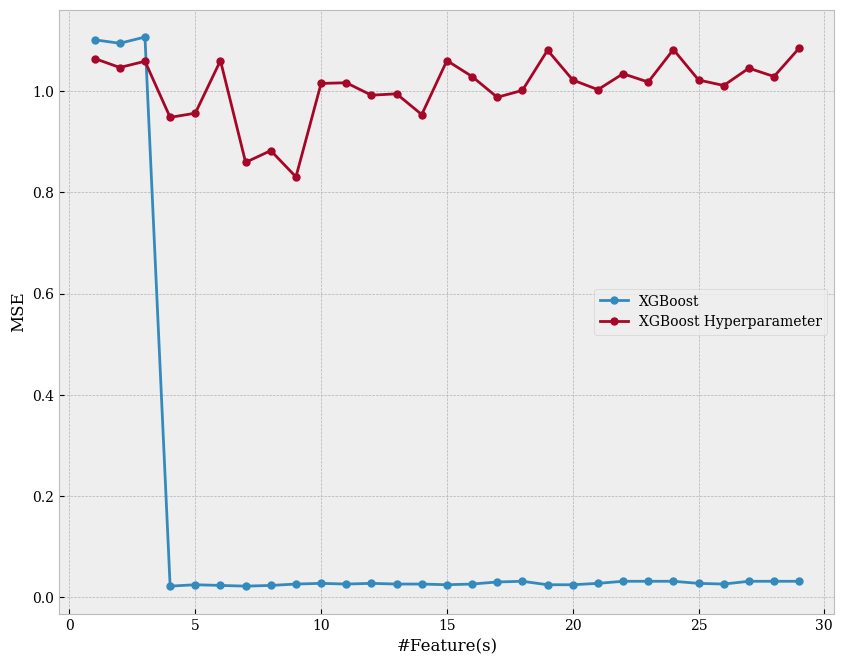

In [187]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb_hyp"], label = "XGBoost Hyperparameter", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

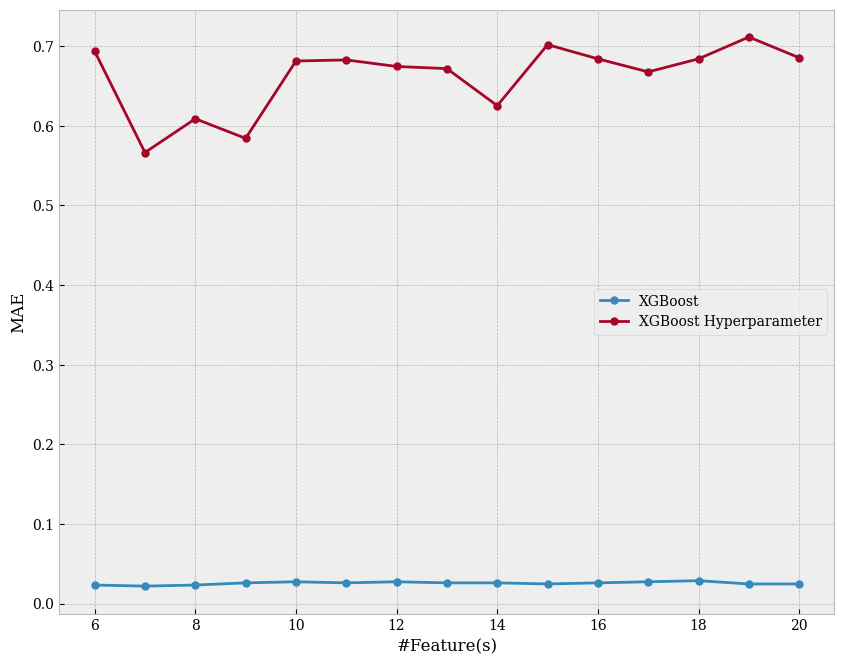

In [188]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_xgb"][5:20], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_svm"][5:20], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_xgb_hyp"][5:20], label = "XGBoost Hyperparameter", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

# XGBoost with Hyperparameter Tuning using the random search method in 25 Iteration

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [190]:
# initial condition
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

In [191]:
model_hyp_rand_25 = XGBClassifier(objective="multi:softmax", tree_method='hist')
clf_hyp_rand_25 = RandomizedSearchCV(estimator=model_hyp_rand_25,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

## XGBoost Full_data with hyperparameter tuning using the random search method in 25 Iteration

In [192]:
clf_full_hyp_rand_25 = clf_hyp_rand_25.fit(X_full_train, y_full_train)
clf_full_hyp_rand_25

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [194]:
full_param = clf_full_hyp_rand_25.best_params_
model_full_param = XGBClassifier(
    colsample_bytree = full_param['colsample_bytree'], 
    colsample_bylevel = full_param["colsample_bylevel"],
    learning_rate = full_param["learning_rate"],
    max_depth = full_param["max_depth"],
    n_estimators = full_param["n_estimators"],
    num_class = full_param["num_class"],
    subsample = full_param["subsample"]
)

In [195]:
clf_full_param, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_full_param)

Training model 
  Training time : 11.686387062072754 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 9.636028289794922 seconds
  Testing accuracy : 0.9740082079343365

  MSE   : 0.16121970123301765
  MAE   : 0.025991792065663474
  MAPE  : 30804375016214.074

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78        14
         1.0       0.90      0.90      0.90        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       1.00      0.33      0.50         3

    accuracy                           0.97       731
   macro avg       0.97      0.82      0.86       731
weighted avg       0.97      0.97      0.97       731



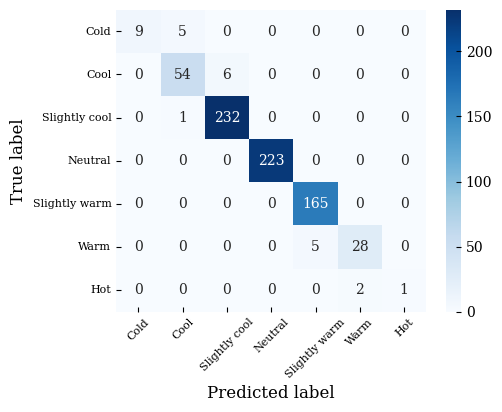

In [196]:
confusion(y_full_test, y_full_pred)

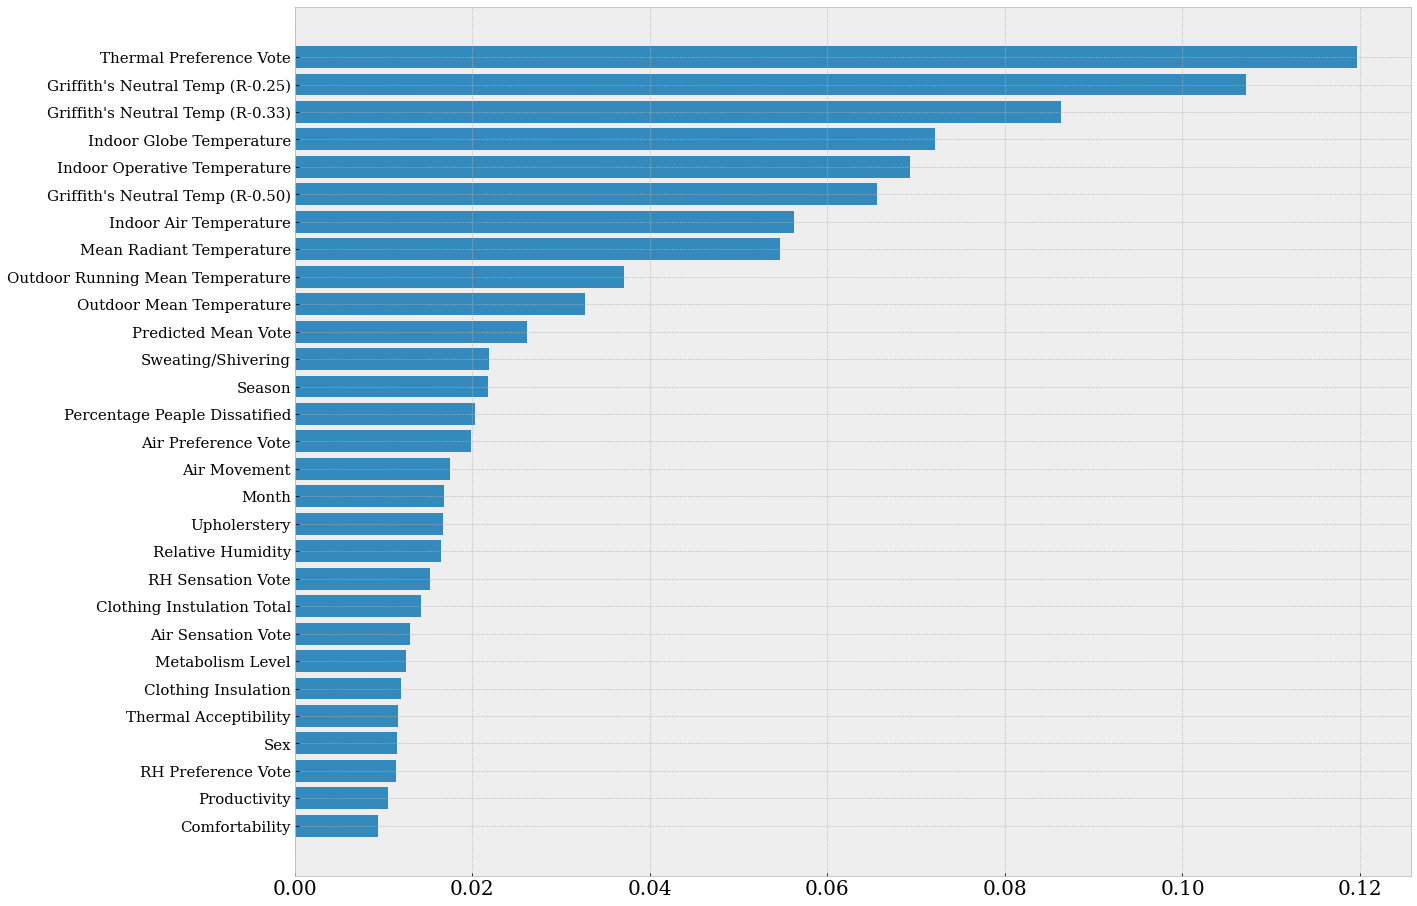

In [198]:
importance_full_hyp_rand_25 = importance(clf_full_param, X_full)

## XGBoost main_data with hyperparameter tuning using the random search method in 25 Iteration

In [199]:
clf_main_hyp_rand_25 = clf_hyp_rand_25.fit(X_main_train, y_main_train)
clf_main_hyp_rand_25

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [200]:
main_param = clf_main_hyp_rand_25.best_params_
model_main_param = XGBClassifier(
    colsample_bytree = main_param['colsample_bytree'], 
    colsample_bylevel = main_param["colsample_bylevel"],
    learning_rate = main_param["learning_rate"],
    max_depth = main_param["max_depth"],
    n_estimators = main_param["n_estimators"],
    num_class = main_param["num_class"],
    subsample = main_param["subsample"]
)

In [201]:
clf_main_param, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_main_param)

Training model 
  Training time : 8.025161981582642 seconds
  Training accuracy : 0.9817968291250734

Testing model 
  Testing time : 3.867560386657715 seconds
  Testing accuracy : 0.506155950752394

  MSE   : 1.0526495786494747
  MAE   : 0.6730506155950753
  MAPE  : 123217500064856.52

Report :
              precision    recall  f1-score   support

         0.0       0.56      0.36      0.43        14
         1.0       0.34      0.23      0.28        60
         2.0       0.54      0.56      0.55       233
         3.0       0.49      0.57      0.53       223
         4.0       0.54      0.53      0.54       165
         5.0       0.29      0.12      0.17        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.51       731
   macro avg       0.39      0.34      0.36       731
weighted avg       0.50      0.51      0.50       731



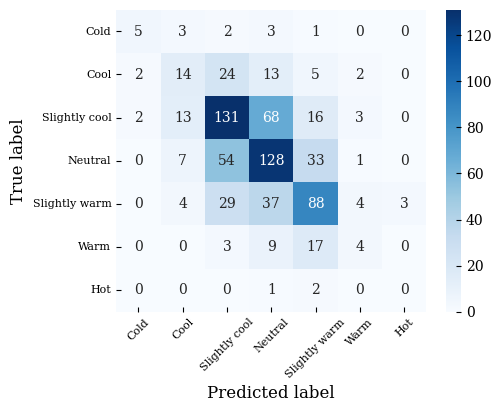

In [202]:
confusion(y_main_test, y_main_pred)

## XGBoost others_data with hyperparameter tuning using the random search method in 25 Iteration

In [203]:
clf_others_hyp_rand_25 = clf_hyp_rand_25.fit(X_others_train, y_others_train)
clf_others_hyp_rand_25

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [208]:
others_param = clf_others_hyp_rand_25.best_params_
model_others_param = XGBClassifier(
    colsample_bytree = others_param['colsample_bytree'], 
    colsample_bylevel = others_param["colsample_bylevel"],
    learning_rate = others_param["learning_rate"],
    max_depth = others_param["max_depth"],
    n_estimators = others_param["n_estimators"],
    num_class = others_param["num_class"],
    subsample = others_param["subsample"]
)

In [209]:
clf_others_param, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_others_param)

Training model 
  Training time : 7.883398532867432 seconds
  Training accuracy : 0.9994128009395185

Testing model 
  Testing time : 7.491009473800659 seconds
  Testing accuracy : 0.9726402188782489

  MSE   : 0.16540792339471233
  MAE   : 0.027359781121751026
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        14
         1.0       0.92      0.90      0.91        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      0.99      1.00       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.85      0.89        33
         6.0       1.00      0.33      0.50         3

    accuracy                           0.97       731
   macro avg       0.97      0.83      0.87       731
weighted avg       0.97      0.97      0.97       731



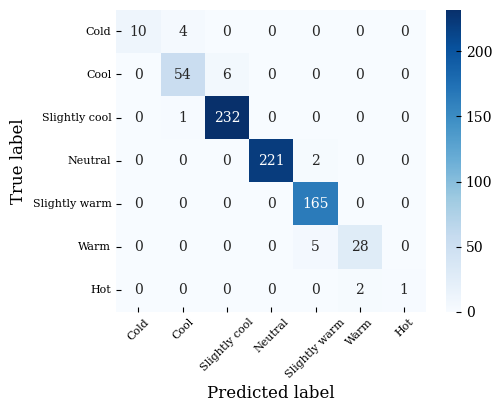

In [210]:
confusion(y_others_test, y_others_pred)

## XGBoost importance with hyperparameter tuning using the random search method in 25 Iteration

In [211]:
importance_feature = importance_full_hyp_rand_25.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.33)", 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', 'Mean Radiant Temperature', 'Outdoor Running Mean Temperature', 'Outdoor Mean Temperature', 'Predicted Mean Vote', 'Sweating/Shivering', 'Season', 'Percentage Peaple Dissatified', 'Air Preference Vote', 'Air Movement', 'Month', 'Upholerstery', 'Relative Humidity', 'RH Sensation Vote']


20

In [212]:
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

#Selected data
y_importance = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_importance = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [213]:
clf_important_hyp_rand_25 = clf_hyp_rand_25.fit(X_important_train, y_important_train)
clf_important_hyp_rand_25

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [214]:
important_param = clf_important_hyp_rand_25.best_params_
model_important_param = XGBClassifier(
    colsample_bytree = important_param['colsample_bytree'], 
    colsample_bylevel = important_param["colsample_bylevel"],
    learning_rate = important_param["learning_rate"],
    max_depth = important_param["max_depth"],
    n_estimators = important_param["n_estimators"],
    num_class = important_param["num_class"],
    subsample = important_param["subsample"]
)

In [215]:
clf_important_param, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_important_param)

Training model 
  Training time : 9.179615259170532 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 7.769275903701782 seconds
  Testing accuracy : 0.9753761969904241

  MSE   : 0.15691973428978245
  MAE   : 0.024623803009575923
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        14
         1.0       0.92      0.90      0.91        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       1.00      0.33      0.50         3

    accuracy                           0.98       731
   macro avg       0.97      0.83      0.87       731
weighted avg       0.98      0.98      0.97       731



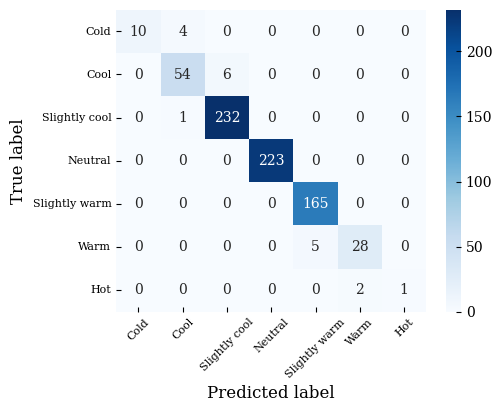

In [216]:
confusion(y_important_test, y_important_pred)

# compare

In [217]:
importance_feature = importance_full_hyp_rand_25.sort_values(by=['Importances'], ascending=False)
# importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['Thermal Preference Vote', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.33)", 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', 'Mean Radiant Temperature', 'Outdoor Running Mean Temperature', 'Outdoor Mean Temperature', 'Predicted Mean Vote', 'Sweating/Shivering', 'Season', 'Percentage Peaple Dissatified', 'Air Preference Vote', 'Air Movement', 'Month', 'Upholerstery', 'Relative Humidity', 'RH Sensation Vote', 'Clothing Instulation Total', 'Air Sensation Vote', 'Metabolism Level', 'Clothing Insulation', 'Thermal Acceptibility', 'Sex', 'RH Preference Vote', 'Productivity', 'Comfortability']


29

# Menggunakan 1 per 1 best param

In [223]:
featureNum = []

# XGBoost data
trainAcc_xgb = []
testAcc_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

# SVM data
# trainAcc_svm = []
# testAcc_svm = []
# MSE_svm = []
# MAE_svm = []
# MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp = []
testAcc_xgb_hyp = []
MSE_xgb_hyp = []
MAE_xgb_hyp = []
MAPE_xgb_hyp = []


model_xgb = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum.append(i + 1)
#     y = data[['TSV']].values.ravel()
#     x = data[importance_features[0:i + 1]]
    
    full_data_renamed = full_data
    full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

    #Selected data
    y = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
    x = full_data_renamed[importance_features[0:i+1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    
#     # SVM
#     clf = model_svm.fit(X_train, y_train)
#     y_pred = clf.predict(X_train)
#     trainAcc_svm.append(accuracy_score(y_train, y_pred))
    
#     clf = model_svm.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     testAcc_svm.append(accuracy_score(y_test, y_pred))
    
#     MSE_svm.append(mean_squared_error(y_test, y_pred))
#     MAE_svm.append(mean_absolute_error(y_test, y_pred))
#     MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # XGBoost with parameter tuning using random seacrh
    clf_hyp_rand_25 = clf_hyp_rand_25.fit(X_train, y_train)
    
    full_param = clf_hyp_rand_25.best_params_
    model_full_param = XGBClassifier(
        colsample_bytree = full_param['colsample_bytree'], 
        colsample_bylevel = full_param["colsample_bylevel"],
        learning_rate = full_param["learning_rate"],
        max_depth = full_param["max_depth"],
        n_estimators = full_param["n_estimators"],
        num_class = full_param["num_class"],
        subsample = full_param["subsample"]
    )
    
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp.append(accuracy_score(y_train, y_pred))
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb_hyp.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp.append(mean_absolute_percentage_error(y_test, y_pred))
    

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 

In [226]:
data_comp3 = {'featureNum': featureNum,
             'trainAcc_xgb': trainAcc_xgb,
             "testAcc_xgb" : testAcc_xgb,
             "MSE_xgb" : MSE_xgb,
             "MAE_xgb" : MAE_xgb,
             "MAPE_xgb" : MAPE_xgb,
             "trainAcc_svm" : trainAcc_svm,
             "testAcc_svm" : testAcc_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp,
             "MSE_xgb_hyp" : MSE_xgb_hyp,
             "MAE_xgb_hyp" : MAE_xgb_hyp,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp
            } 
comp_table3 = pd.DataFrame.from_dict(data_comp3)
comp_table3

featureNum  trainAcc_xgb  testAcc_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  \
0            1      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1            2      0.937757     0.727770  0.608755  0.370725  1.417001e+14   
2            3      0.999413     0.924761  0.091655  0.080711  5.544788e+13   
3            4      1.000000     0.972640  0.027360  0.027360  1.232175e+13   
4            5      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
5            6      1.000000     0.975376  0.024624  0.024624  1.848263e+13   
6            7      1.000000     0.978112  0.021888  0.021888  6.160875e+12   
7            8      1.000000     0.978112  0.021888  0.021888  6.160875e+12   
8            9      1.000000     0.975376  0.024624  0.024624  6.160875e+12   
9           10      1.000000     0.976744  0.023256  0.023256  6.160875e+12   
10          11      1.000000     0.975376  0.028728  0.025992  1.848263e+13   
11          12      1.000000     0.975376  0.028728  0.025992  1.232175e+13   
12          13      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
13          14      1.000000     0.975376  0.032832  0.027360  1.848263e+13   
14          15      1.000000     0.976744  0.027360  0.024624  1.848263e+13   
15          16      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
16          17      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
17          18      1.000000     0.975376  0.028728  0.025992  1.848263e+13   
18          19      1.000000     0.975376  0.032832  0.027360  1.848263e+13   
19          20      1.000000     0.974008  0.034200  0.028728  1.848263e+13   
20          21      1.000000     0.975376  0.028728  0.025992  2.464350e+13   
21          22      1.000000     0.974008  0.034200  0.028728  2.464350e+13   
22          23      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
23          24      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
24          25      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
25          26      1.000000     0.974008  0.030096  0.027360  1.232175e+13   
26          27      1.000000     0.974008  0.034200  0.028728  1.848263e+13   
27          28      1.000000     0.971272  0.036936  0.031464  2.464350e+13   
28          29      1.000000     0.971272  0.032832  0.030096  1.848263e+13   

    trainAcc_svm  testAcc_svm   MSE_svm   MAE_svm      MAPE_svm  \
0       0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1       0.552554     0.540356  0.708618  0.536252  1.725045e+14   
2       0.760423     0.723666  0.321477  0.291382  1.355393e+14   
3       0.985907     0.984952  0.015048  0.015048  4.928700e+13   
4       0.989430     0.994528  0.005472  0.005472  6.160875e+12   
5       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
6       0.987669     0.987688  0.012312  0.012312  3.696525e+13   
7       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
8       0.986494     0.986320  0.013680  0.013680  4.312613e+13   
9       0.986494     0.986320  0.013680  0.013680  4.312613e+13   
10      0.971814     0.974008  0.025992  0.025992  8.625225e+13   
11      0.963594     0.963064  0.036936  0.036936  8.625225e+13   
12      0.954198     0.952120  0.047880  0.047880  8.625225e+13   
13      0.880211     0.864569  0.147743  0.139535  9.241313e+13   
14      0.869055     0.848153  0.168263  0.157319  9.241313e+13   
15      0.866119     0.844049  0.172367  0.161423  9.241313e+13   
16      0.866119     0.846785  0.169631  0.158687  9.241313e+13   
17      0.866119     0.844049  0.172367  0.161423  9.241313e+13   
18      0.866119     0.845417  0.212038  0.173735  1.540219e+14   
19      0.865531     0.846785  0.222982  0.176471  1.725045e+14   
20      0.866119     0.846785  0.222982  0.176471  1.725045e+14   
21      0.865531     0.848153  0.221614  0.175103  1.725045e+14   
22      0.866119     0.848153  0.221614  0.175103  1.725045e+14   
23      0.865531     0.84

In [238]:
comp_table3.to_csv('compare_hyp_rand_1per1.csv')

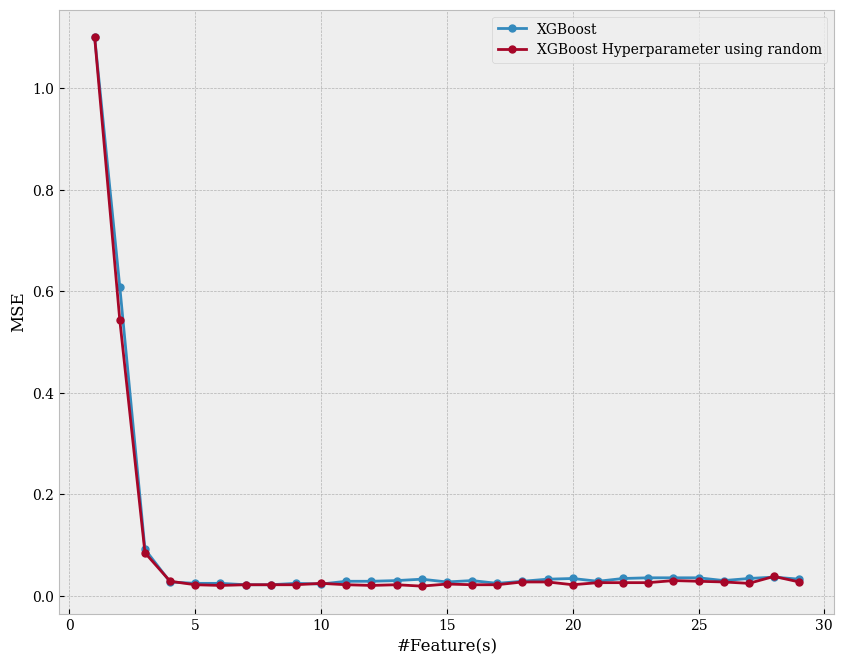

In [227]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table3["featureNum"], comp_table3["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table3["featureNum"], comp_table3["MSE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

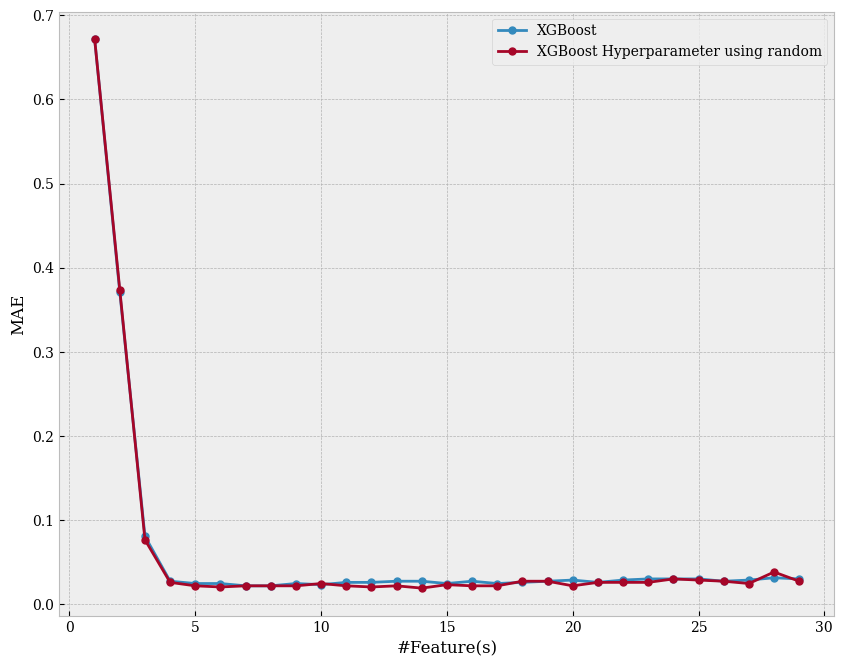

In [236]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table3["featureNum"], comp_table3["MAE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_svm"][5:20], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table3["featureNum"], comp_table3["MAE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()elegram

# menggunakan best param full_data

In [229]:
featureNum1 = []

# XGBoost data
trainAcc_xgb1 = []
testAcc_xgb1 = []
MSE_xgb1 = []
MAE_xgb1 = []
MAPE_xgb1 = []

# SVM data
# trainAcc_svm = []
# testAcc_svm = []
# MSE_svm = []
# MAE_svm = []
# MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp1 = []
testAcc_xgb_hyp1 = []
MSE_xgb_hyp1 = []
MAE_xgb_hyp1 = []
MAPE_xgb_hyp1 = []


model_xgb1 = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum1.append(i + 1)
#     y = data[['TSV']].values.ravel()
#     x = data[importance_features[0:i + 1]]
    
    full_data_renamed = full_data
    full_data_renamed.rename(renamed_column, axis='columns', inplace=True)

    #Selected data
    y = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
    x = full_data_renamed[importance_features[0:i+1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    clf = model_xgb1.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb1.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb1.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb1.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb1.append(mean_squared_error(y_test, y_pred))
    MAE_xgb1.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb1.append(mean_absolute_percentage_error(y_test, y_pred))
    
#     # SVM
#     clf = model_svm.fit(X_train, y_train)
#     y_pred = clf.predict(X_train)
#     trainAcc_svm.append(accuracy_score(y_train, y_pred))
    
#     clf = model_svm.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     testAcc_svm.append(accuracy_score(y_test, y_pred))
    
#     MSE_svm.append(mean_squared_error(y_test, y_pred))
#     MAE_svm.append(mean_absolute_error(y_test, y_pred))
#     MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # XGBoost with parameter tuning using random seacrh
    
    full_param = clf_full_hyp_rand_25.best_params_
    model_full_param = XGBClassifier(
        colsample_bytree = full_param['colsample_bytree'], 
        colsample_bylevel = full_param["colsample_bylevel"],
        learning_rate = full_param["learning_rate"],
        max_depth = full_param["max_depth"],
        n_estimators = full_param["n_estimators"],
        num_class = full_param["num_class"],
        subsample = full_param["subsample"]
    )
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp1.append(accuracy_score(y_train, y_pred))
    
    clf = model_full_param.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp1.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb_hyp1.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp1.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp1.append(mean_absolute_percentage_error(y_test, y_pred))
    print("iterasi ke ", i + 1)
    

iterasi ke  1
iterasi ke  2
iterasi ke  3
iterasi ke  4
iterasi ke  5
iterasi ke  6
iterasi ke  7
iterasi ke  8
iterasi ke  9
iterasi ke  10
iterasi ke  11
iterasi ke  12
iterasi ke  13
iterasi ke  14
iterasi ke  15
iterasi ke  16
iterasi ke  17
iterasi ke  18
iterasi ke  19
iterasi ke  20
iterasi ke  21
iterasi ke  22
iterasi ke  23
iterasi ke  24
iterasi ke  25
iterasi ke  26
iterasi ke  27
iterasi ke  28
iterasi ke  29


In [230]:
data_comp4 = {'featureNum': featureNum1,
             'trainAcc_xgb': trainAcc_xgb1,
             "testAcc_xgb" : testAcc_xgb1,
             "MSE_xgb" : MSE_xgb1,
             "MAE_xgb" : MAE_xgb1,
             "MAPE_xgb" : MAPE_xgb1,
             "trainAcc_svm" : trainAcc_svm,
             "testAcc_svm" : testAcc_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp1,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp1,
             "MSE_xgb_hyp" : MSE_xgb_hyp1,
             "MAE_xgb_hyp" : MAE_xgb_hyp1,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp1
            } 
comp_table4 = pd.DataFrame.from_dict(data_comp4)
comp_table4

featureNum  trainAcc_xgb  testAcc_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  \
0            1      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1            2      0.937757     0.727770  0.608755  0.370725  1.417001e+14   
2            3      0.999413     0.924761  0.091655  0.080711  5.544788e+13   
3            4      1.000000     0.972640  0.027360  0.027360  1.232175e+13   
4            5      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
5            6      1.000000     0.975376  0.024624  0.024624  1.848263e+13   
6            7      1.000000     0.978112  0.021888  0.021888  6.160875e+12   
7            8      1.000000     0.978112  0.021888  0.021888  6.160875e+12   
8            9      1.000000     0.975376  0.024624  0.024624  6.160875e+12   
9           10      1.000000     0.976744  0.023256  0.023256  6.160875e+12   
10          11      1.000000     0.975376  0.028728  0.025992  1.848263e+13   
11          12      1.000000     0.975376  0.028728  0.025992  1.232175e+13   
12          13      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
13          14      1.000000     0.975376  0.032832  0.027360  1.848263e+13   
14          15      1.000000     0.976744  0.027360  0.024624  1.848263e+13   
15          16      1.000000     0.974008  0.030096  0.027360  2.464350e+13   
16          17      1.000000     0.975376  0.024624  0.024624  1.232175e+13   
17          18      1.000000     0.975376  0.028728  0.025992  1.848263e+13   
18          19      1.000000     0.975376  0.032832  0.027360  1.848263e+13   
19          20      1.000000     0.974008  0.034200  0.028728  1.848263e+13   
20          21      1.000000     0.975376  0.028728  0.025992  2.464350e+13   
21          22      1.000000     0.974008  0.034200  0.028728  2.464350e+13   
22          23      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
23          24      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
24          25      1.000000     0.972640  0.035568  0.030096  2.464350e+13   
25          26      1.000000     0.974008  0.030096  0.027360  1.232175e+13   
26          27      1.000000     0.974008  0.034200  0.028728  1.848263e+13   
27          28      1.000000     0.971272  0.036936  0.031464  2.464350e+13   
28          29      1.000000     0.971272  0.032832  0.030096  1.848263e+13   

    trainAcc_svm  testAcc_svm   MSE_svm   MAE_svm      MAPE_svm  \
0       0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1       0.552554     0.540356  0.708618  0.536252  1.725045e+14   
2       0.760423     0.723666  0.321477  0.291382  1.355393e+14   
3       0.985907     0.984952  0.015048  0.015048  4.928700e+13   
4       0.989430     0.994528  0.005472  0.005472  6.160875e+12   
5       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
6       0.987669     0.987688  0.012312  0.012312  3.696525e+13   
7       0.987082     0.987688  0.012312  0.012312  3.696525e+13   
8       0.986494     0.986320  0.013680  0.013680  4.312613e+13   
9       0.986494     0.986320  0.013680  0.013680  4.312613e+13   
10      0.971814     0.974008  0.025992  0.025992  8.625225e+13   
11      0.963594     0.963064  0.036936  0.036936  8.625225e+13   
12      0.954198     0.952120  0.047880  0.047880  8.625225e+13   
13      0.880211     0.864569  0.147743  0.139535  9.241313e+13   
14      0.869055     0.848153  0.168263  0.157319  9.241313e+13   
15      0.866119     0.844049  0.172367  0.161423  9.241313e+13   
16      0.866119     0.846785  0.169631  0.158687  9.241313e+13   
17      0.866119     0.844049  0.172367  0.161423  9.241313e+13   
18      0.866119     0.845417  0.212038  0.173735  1.540219e+14   
19      0.865531     0.846785  0.222982  0.176471  1.725045e+14   
20      0.866119     0.846785  0.222982  0.176471  1.725045e+14   
21      0.865531     0.848153  0.221614  0.175103  1.725045e+14   
22      0.866119     0.848153  0.221614  0.175103  1.725045e+14   
23      0.865531     0.84

In [239]:
comp_table4.to_csv('compare_hyp_rand_usingfullparam.csv')

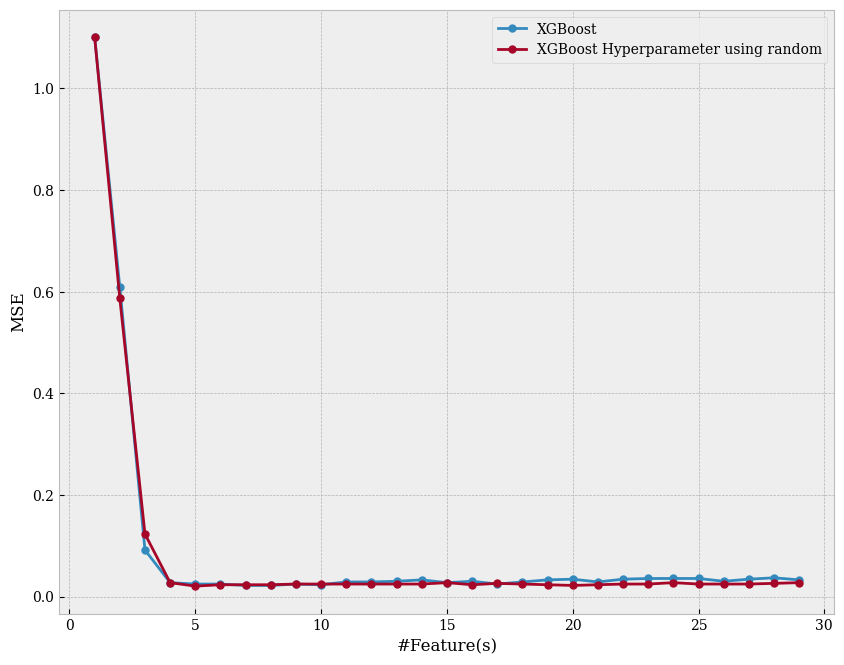

In [231]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table4["featureNum"], comp_table4["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table4["featureNum"], comp_table4["MSE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

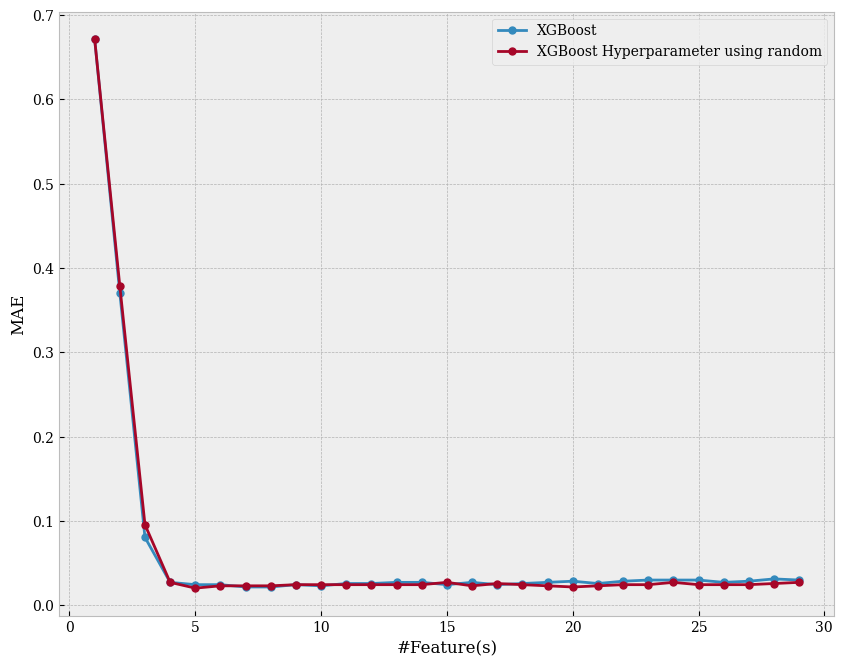

In [235]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table4["featureNum"], comp_table4["MAE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
# plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_svm"][5:20], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table4["featureNum"], comp_table4["MAE_xgb_hyp"], label = "XGBoost Hyperparameter using random", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()

# Hyper Start - ORET ORET JIAHAHAHA

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [77]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [78]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [79]:
grid_search.fit(X_main_train, y_main_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


Exception ignored in: <function DMatrix.__del__ at 0x000001B5DF7C0A60>
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 796, in __del__
    if hasattr(self, "handle") and self.handle:
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

# Coba 2

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [80]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

In [83]:
xgbclf = XGBClassifier(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

In [84]:
clf.fit(X_main_train, y_main_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           pr

In [95]:
y_pred_random = clf.predict(X_main_test)
accuracy_random = accuracy_score(y_main_test, y_pred_random)
print(f"Accuracy (Randomize Search Model) : {accuracy_random}")
print(f"Best hyperparameter :\n{clf.best_params_}")

Accuracy (Randomize Search Model) : 0.506155950752394
Best hyperparameter :
{'subsample': 0.8999999999999999, 'num_class': 10, 'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}


In [87]:
main_param = clf.best_params_
main_param

{'subsample': 0.8999999999999999,
 'num_class': 10,
 'n_estimators': 250,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.7999999999999999}

In [88]:
for i in main_param:
    print(type(main_param[i]))

<class 'numpy.float64'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [89]:
m_coba = XGBClassifier(
    colsample_bytree = main_param['colsample_bytree'], 
    colsample_bylevel = main_param["colsample_bylevel"],
    learning_rate = main_param["learning_rate"],
    max_depth = main_param["max_depth"],
    n_estimators = main_param["n_estimators"],
    num_class = main_param["num_class"],
    subsample = main_param["subsample"]
)

In [90]:
clf_coba, y_main_pred_coba = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, m_coba)

Training model 
  Training time : 3.5148770809173584 seconds
  Training accuracy : 0.8937169700528479

Testing model 
  Testing time : 3.357964515686035 seconds
  Testing accuracy : 0.5047879616963065

  MSE   : 1.042407660738714
  MAE   : 0.6621067031463749
  MAPE  : 160182750084313.38

Report :
              precision    recall  f1-score   support

         0.0       0.67      0.29      0.40        14
         1.0       0.67      0.17      0.27        60
         2.0       0.52      0.63      0.57       233
         3.0       0.46      0.57      0.51       223
         4.0       0.54      0.48      0.51       165
         5.0       1.00      0.06      0.11        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.50       731
   macro avg       0.55      0.31      0.34       731
weighted avg       0.54      0.50      0.49       731



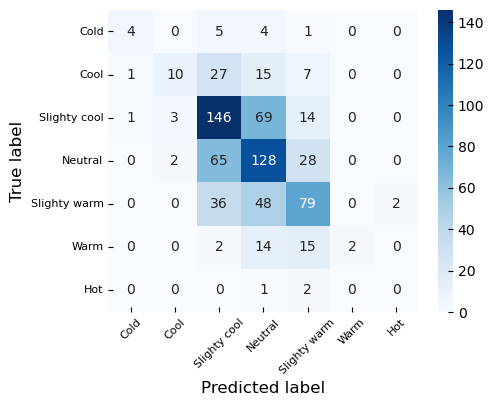

In [91]:
confusion(y_main_test, y_main_pred_coba)